In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,ShuffleSplit,cross_val_score,StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [0]:
data = pd.read_csv("drive/My Drive/Thesis/Wildfire.csv")
X = data.loc[:,['NDVI','LST','Burned_Area','SM','SUSM']].values.astype('float32')
nor_X = preprocessing.normalize(X)
Y = data.loc[:,['Class']].values.astype('int')
labelencoder_y_1 = LabelEncoder()
Y = labelencoder_y_1.fit_transform(Y)

In [0]:
pd.value_counts(data['Class']).plot.bar()
plt.title('class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
pd.value_counts(data['Class'])

In [0]:
sm = SMOTE(random_state=42,ratio=0.5)
X_OS, Y_OS = sm.fit_sample(X, Y)

Resampled dataset shape Counter({0: 168819, 1: 84409})


Text(0, 0.5, 'Frequency')

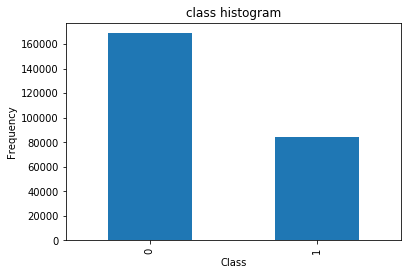

In [0]:
print('Resampled dataset shape %s' % Counter(Y_OS))

pd.value_counts(Y_OS).plot.bar()
plt.title('class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [0]:
np.random.seed(1080)
X_train, X_test, y_train, y_test = train_test_split(X_OS,Y_OS,test_size = 0.20)

In [0]:
kfold = StratifiedShuffleSplit(n_splits=10, test_size=0.15, random_state=12)
training_accuracy = []
testing_accuracy = []
epochs=10
for train, test in kfold.split(X_train, y_train):

  clf = MLPClassifier(solver='sgd',learning_rate='adaptive',momentum=0.9, activation='relu',alpha=5, batch_size='auto',verbose=True,n_iter_no_change = epochs)
  clf.fit(X_train,y_train)
  model = clf
  
  #training accuracy
  y_tr_pred = clf.predict(X_train)
  results_tr = cross_val_score(model, X_train ,y_tr_pred, cv = kfold,verbose=1)
  training_accuracy.append(results_tr.max()*100.0)
  
  #testing Accuracy
  y_te_pred = clf.predict(X_test)
  results = cross_val_score(model, X_test ,y_te_pred, cv = kfold,verbose=1)
  testing_accuracy.append(results.max()*100.0)
  
  print("Training Accuracy (Shuffle Split) : %.3f%% (%.3f%%)" % (results_tr.max()*100.0, results_tr.std()*100.0))
  print("Prediction Accuracy (Shuffle Split) : %.3f%% (%.3f%%)" % (results.max()*100.0, results.std()*100.0))

Iteration 1, loss = inf
Iteration 2, loss = 0.65132261
Iteration 3, loss = 0.62284825
Iteration 4, loss = 0.60659814
Iteration 5, loss = 0.59754426
Iteration 6, loss = 0.59120979
Iteration 7, loss = 0.58969643
Iteration 8, loss = 0.62144730
Iteration 9, loss = 0.60139514
Iteration 10, loss = 0.59349927
Iteration 11, loss = 0.59136687
Iteration 12, loss = 0.64772722
Iteration 13, loss = 0.63227082
Iteration 14, loss = 0.60435107
Iteration 15, loss = 0.59495870
Iteration 16, loss = 0.58831552
Iteration 17, loss = 0.58629542
Iteration 18, loss = 0.58424509
Iteration 19, loss = 0.60536018
Iteration 20, loss = 0.59601182
Iteration 21, loss = 0.58987849
Iteration 22, loss = 0.58573901
Iteration 23, loss = 0.60023582
Iteration 24, loss = 0.60818039
Iteration 25, loss = 0.60030878
Iteration 26, loss = 0.59129361
Iteration 27, loss = 0.58760845
Iteration 28, loss = 0.58601199
Iteration 29, loss = 0.58581587
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.64144713
Iteration 3, loss = 0.61014956
Iteration 4, loss = 0.59327301
Iteration 5, loss = 0.58040589
Iteration 6, loss = 0.57421608
Iteration 7, loss = 0.57159771
Iteration 8, loss = 0.58059909
Iteration 9, loss = 0.57678562
Iteration 10, loss = 0.57146354
Iteration 11, loss = 0.56890831
Iteration 12, loss = 0.56741165
Iteration 13, loss = 0.56489751
Iteration 14, loss = 0.56327019
Iteration 15, loss = 0.56518520
Iteration 16, loss = 0.56481037
Iteration 17, loss = 0.56469008
Iteration 18, loss = 0.56501039
Iteration 19, loss = 0.57283742
Iteration 20, loss = 0.63904884
Iteration 21, loss = 0.62370516
Iteration 22, loss = 0.60823974
Iteration 23, loss = 0.58959033
Iteration 24, loss = 0.57240000
Iteration 25, loss = 0.56630940
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 26, loss = 0.53935913
Iteration 27, loss = 0.52693319
Iteration 28, loss = 0.51376165
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.92593663
Iteration 2, loss = 0.63301839
Iteration 3, loss = 0.60573350
Iteration 4, loss = 0.58944346
Iteration 5, loss = 0.57896644
Iteration 6, loss = 0.57149600
Iteration 7, loss = 0.56784322
Iteration 8, loss = 0.56662625
Iteration 9, loss = 0.56367761
Iteration 10, loss = 0.56354804
Iteration 11, loss = 0.56475770
Iteration 12, loss = 0.56231617
Iteration 13, loss = 0.56364734
Iteration 14, loss = 0.56236301
Iteration 15, loss = 0.56411958
Iteration 16, loss = 0.56400625
Iteration 17, loss = 0.56358566
Iteration 18, loss = 0.56333423
Iteration 19, loss = 0.56272450
Iteration 20, loss = 0.58005887
Iteration 21, loss = 0.57756320
Iteration 22, loss = 0.57214939
Iteration 23, loss = 0.56836616
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 24, loss = 0.51249993
Iteration 25, loss = 0.48940516
Iteration 26, loss = 0.51234740
Iteration 27, loss = 0.51208496
Iteration 28, loss = 0.51630449

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 58.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.68171525
Iteration 3, loss = 0.67011339
Iteration 4, loss = 0.66563650
Iteration 5, loss = 0.65074094
Iteration 6, loss = 0.63701749
Iteration 7, loss = 0.63252123
Iteration 8, loss = 0.62115049
Iteration 9, loss = 0.61646876
Iteration 10, loss = 0.60523876
Iteration 11, loss = 0.60602610
Iteration 12, loss = 0.60211752
Iteration 13, loss = 0.59898779
Iteration 14, loss = 0.59332125
Iteration 15, loss = 0.59037516
Iteration 16, loss = 0.58539844
Iteration 17, loss = 0.58437597
Iteration 18, loss = 0.58150616
Iteration 19, loss = 0.57755999
Iteration 20, loss = 0.58072465
Iteration 21, loss = 0.57411799
Iteration 22, loss = 0.57509488
Iteration 23, loss = 0.57606852
Iteration 24, loss = 0.57107262
Iteration 25, loss = 0.57252118
Iteration 26, loss = 0.57213272
Iteration 27, loss = 0.57003363
Iteration 28, loss = 0.56645478
Iteration 29, loss = 0.57096490
Iteration 30, loss = 0.56806157
Iteration 31, loss = 0.56620042
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.72122352
Iteration 3, loss = 0.70131451
Iteration 4, loss = 0.68159670
Iteration 5, loss = 0.66941472
Iteration 6, loss = 0.65735476
Iteration 7, loss = 0.64797051
Iteration 8, loss = 0.63988056
Iteration 9, loss = 0.63280379
Iteration 10, loss = 0.62371352
Iteration 11, loss = 0.61767230
Iteration 12, loss = 0.61545696
Iteration 13, loss = 0.60681406
Iteration 14, loss = 0.60251932
Iteration 15, loss = 0.60210846
Iteration 16, loss = 0.60138518
Iteration 17, loss = 0.59594845
Iteration 18, loss = 0.59185611
Iteration 19, loss = 0.59288654
Iteration 20, loss = 0.58856108
Iteration 21, loss = 0.58435884
Iteration 22, loss = 0.58354524
Iteration 23, loss = 0.58325541
Iteration 24, loss = 0.58027488
Iteration 25, loss = 0.58070237
Iteration 26, loss = 0.57809102
Iteration 27, loss = 0.58040369
Iteration 28, loss = 0.74561857
Iteration 29, loss = 0.68184856
Iteration 30, loss = 0.65868769
Iteration 31, loss = 0.64925941
Iteration 32, loss = 0.6

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70218891
Iteration 3, loss = 0.68233380
Iteration 4, loss = 0.67277053
Iteration 5, loss = 0.66209597
Iteration 6, loss = 0.64972000
Iteration 7, loss = 0.63841135
Iteration 8, loss = 0.63166532
Iteration 9, loss = 0.62353883
Iteration 10, loss = 0.61815926
Iteration 11, loss = 0.60989907
Iteration 12, loss = 0.60641239
Iteration 13, loss = 0.60408394
Iteration 14, loss = 0.60104448
Iteration 15, loss = 0.59317764
Iteration 16, loss = 0.59353248
Iteration 17, loss = 0.59050768
Iteration 18, loss = 0.58238100
Iteration 19, loss = 0.59040654
Iteration 20, loss = 0.58476591
Iteration 21, loss = 0.58059559
Iteration 22, loss = 0.58224159
Iteration 23, loss = 0.57943726
Iteration 24, loss = 0.57513047
Iteration 25, loss = 0.57683187
Iteration 26, loss = 0.57663206
Iteration 27, loss = 0.57328651
Iteration 28, loss = 0.57425460
Iteration 29, loss = 0.57284067
Iteration 30, loss = 0.57277660
Iteration 31, loss = 0.57060024
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70129782
Iteration 3, loss = 0.68048923
Iteration 4, loss = 0.66692714
Iteration 5, loss = 0.65087905
Iteration 6, loss = 0.64320411
Iteration 7, loss = 0.63099447
Iteration 8, loss = 0.61997616
Iteration 9, loss = 0.61760407
Iteration 10, loss = 0.60813922
Iteration 11, loss = 0.60068589
Iteration 12, loss = 0.59946901
Iteration 13, loss = 0.59335500
Iteration 14, loss = 0.59059885
Iteration 15, loss = 0.58804338
Iteration 16, loss = 0.58458236
Iteration 17, loss = 0.57979375
Iteration 18, loss = 0.57806492
Iteration 19, loss = 0.57768128
Iteration 20, loss = 0.57603530
Iteration 21, loss = 0.57137695
Iteration 22, loss = 0.57341289
Iteration 23, loss = 0.57341559
Iteration 24, loss = 0.56924347
Iteration 25, loss = 0.56973791
Iteration 26, loss = 0.56740580
Iteration 27, loss = 0.56749665
Iteration 28, loss = 0.56878842
Iteration 29, loss = 0.56706599
Iteration 30, loss = 0.56546005
Iteration 31, loss = 0.56660269
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67480929
Iteration 3, loss = 0.66164137
Iteration 4, loss = 0.64566291
Iteration 5, loss = 0.63841569
Iteration 6, loss = 0.63065306
Iteration 7, loss = 0.62213909
Iteration 8, loss = 0.61249959
Iteration 9, loss = 0.61441538
Iteration 10, loss = 0.60583188
Iteration 11, loss = 0.60062514
Iteration 12, loss = 0.60044337
Iteration 13, loss = 0.59422511
Iteration 14, loss = 0.59006591
Iteration 15, loss = 0.58668696
Iteration 16, loss = 0.58302057
Iteration 17, loss = 0.58102078
Iteration 18, loss = 0.57688358
Iteration 19, loss = 0.57690966
Iteration 20, loss = 0.57517871
Iteration 21, loss = 0.57188842
Iteration 22, loss = 0.57404740
Iteration 23, loss = 0.57232460
Iteration 24, loss = 0.57280212
Iteration 25, loss = 0.57019743
Iteration 26, loss = 0.56554315
Iteration 27, loss = 0.57291179
Iteration 28, loss = 0.56612965
Iteration 29, loss = 0.56886693
Iteration 30, loss = 0.56640924
Iteration 31, loss = 0.57402684
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69307554
Iteration 3, loss = 0.67748704
Iteration 4, loss = 0.66925954
Iteration 5, loss = 0.67595187
Iteration 6, loss = 0.65671970
Iteration 7, loss = 0.64872507
Iteration 8, loss = 0.63380670
Iteration 9, loss = 0.62788052
Iteration 10, loss = 0.61917291
Iteration 11, loss = 0.61534357
Iteration 12, loss = 0.60761355
Iteration 13, loss = 0.60425658
Iteration 14, loss = 0.59770295
Iteration 15, loss = 0.59624952
Iteration 16, loss = 0.64740579
Iteration 17, loss = 0.63147908
Iteration 18, loss = 0.61821071
Iteration 19, loss = 0.60744531
Iteration 20, loss = 0.60024772
Iteration 21, loss = 0.59606831
Iteration 22, loss = 0.59158541
Iteration 23, loss = 0.58632915
Iteration 24, loss = 0.58387805
Iteration 25, loss = 0.58288043
Iteration 26, loss = 0.57814992
Iteration 27, loss = 0.57831583
Iteration 28, loss = 0.57828823
Iteration 29, loss = 0.57550468
Iteration 30, loss = 0.57502498
Iteration 31, loss = 0.57128651
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68820216
Iteration 3, loss = 0.67438737
Iteration 4, loss = 0.66141567
Iteration 5, loss = 0.64895678
Iteration 6, loss = 0.63698749
Iteration 7, loss = 0.62840011
Iteration 8, loss = 0.62125530
Iteration 9, loss = 0.61879569
Iteration 10, loss = 0.61008375
Iteration 11, loss = 0.60561939
Iteration 12, loss = 0.59822831
Iteration 13, loss = 0.59819081
Iteration 14, loss = 0.59191499
Iteration 15, loss = 0.58631585
Iteration 16, loss = 0.58632199
Iteration 17, loss = 0.57982237
Iteration 18, loss = 0.58427959
Iteration 19, loss = 0.58286390
Iteration 20, loss = 0.57692406
Iteration 21, loss = 0.57882092
Iteration 22, loss = 0.57558832
Iteration 23, loss = 0.57574363
Iteration 24, loss = 0.57348766
Iteration 25, loss = 0.57281080
Iteration 26, loss = 0.57067741
Iteration 27, loss = 0.57100269
Iteration 28, loss = 0.57195762
Iteration 29, loss = 0.56440965
Iteration 30, loss = 0.57078388
Iteration 31, loss = 0.56903181
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.77126751
Iteration 2, loss = 0.69217266
Iteration 3, loss = 0.66768343
Iteration 4, loss = 0.65570095
Iteration 5, loss = 0.64251589
Iteration 6, loss = 0.63188746
Iteration 7, loss = 0.62514043
Iteration 8, loss = 0.61537167
Iteration 9, loss = 0.60773218
Iteration 10, loss = 0.60583977
Iteration 11, loss = 0.59697819
Iteration 12, loss = 0.59640217
Iteration 13, loss = 0.58884809
Iteration 14, loss = 0.59072978
Iteration 15, loss = 0.58484602
Iteration 16, loss = 0.58412197
Iteration 17, loss = 0.58280851
Iteration 18, loss = 0.57705052
Iteration 19, loss = 0.57541770
Iteration 20, loss = 0.57617193
Iteration 21, loss = 0.57344606
Iteration 22, loss = 0.57223288
Iteration 23, loss = 0.57019190
Iteration 24, loss = 0.57093635
Iteration 25, loss = 0.56873307
Iteration 26, loss = 0.57055486
Iteration 27, loss = 0.56871320
Iteration 28, loss = 0.56608830
Iteration 29, loss = 0.56431078
Iteration 30, loss = 0.56734794
Iteration 31, loss = 0.56608570
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67476156
Iteration 3, loss = 0.65773126
Iteration 4, loss = 0.65050147
Iteration 5, loss = 0.63626306
Iteration 6, loss = 0.62839631
Iteration 7, loss = 0.61992210
Iteration 8, loss = 0.61300216
Iteration 9, loss = 0.60557573
Iteration 10, loss = 0.60097414
Iteration 11, loss = 0.59775056
Iteration 12, loss = 0.59131504
Iteration 13, loss = 0.58842425
Iteration 14, loss = 0.58625601
Iteration 15, loss = 0.58293326
Iteration 16, loss = 0.57833726
Iteration 17, loss = 0.57853368
Iteration 18, loss = 0.57723017
Iteration 19, loss = 0.56781168
Iteration 20, loss = 0.57023454
Iteration 21, loss = 0.57546402
Iteration 22, loss = 0.56876732
Iteration 23, loss = 0.56690518
Iteration 24, loss = 0.56805610
Iteration 25, loss = 0.56754311
Iteration 26, loss = 0.56690482
Iteration 27, loss = 0.56358310
Iteration 28, loss = 0.56690149
Iteration 29, loss = 0.56423185
Iteration 30, loss = 0.56406000
Iteration 31, loss = 0.56441919
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 17.1min finished


[[33312   415]
 [ 1209 15710]]
----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33727
           1       0.97      0.93      0.95     16919

    accuracy                           0.97     50646
   macro avg       0.97      0.96      0.96     50646
weighted avg       0.97      0.97      0.97     50646

Training Accuracy (Shuffle Split) : 99.733% (4.846%)
Prediction Accuracy (Shuffle Split) : 98.986% (9.994%)
Iteration 1, loss = 0.87225576
Iteration 2, loss = 0.63617011
Iteration 3, loss = 0.61204943
Iteration 4, loss = 0.59884399
Iteration 5, loss = 0.59879565
Iteration 6, loss = 0.59014907
Iteration 7, loss = 0.58612943
Iteration 8, loss = 0.58372541
Iteration 9, loss = 0.58178804
Iteration 10, loss = 0.58276042
Iteration 11, loss = 0.58129257
Iteration 12, loss = 0.58138527
Iteration 13, loss = 0.58071514
Iteration 14, loss = 0.58123599
Iteration 15, loss = 0.59220981
Iteration 16, loss = 0.63643

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.61921571
Iteration 3, loss = 0.59661277
Iteration 4, loss = 0.58233253
Iteration 5, loss = 0.57492069
Iteration 6, loss = 0.56833984
Iteration 7, loss = 0.56361426
Iteration 8, loss = 0.56019395
Iteration 9, loss = 0.55943939
Iteration 10, loss = 0.56248393
Iteration 11, loss = 0.56167138
Iteration 12, loss = 0.55875065
Iteration 13, loss = 0.56111247
Iteration 14, loss = 0.56072674
Iteration 15, loss = 0.56142731
Iteration 16, loss = 0.56129525
Iteration 17, loss = 0.56267099
Iteration 18, loss = 0.56268812
Iteration 19, loss = 0.56434022
Iteration 20, loss = 0.56359995
Iteration 21, loss = 0.56322001
Iteration 22, loss = 0.56313409
Iteration 23, loss = 0.56187155
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 24, loss = 0.49644706
Iteration 25, loss = 0.47967754
Iteration 26, loss = 0.50316137
Iteration 27, loss = 0.50577099
Iteration 28, loss = 0.50898479
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63424396
Iteration 3, loss = 0.60568558
Iteration 4, loss = 0.59137575
Iteration 5, loss = 0.58060790
Iteration 6, loss = 0.57471509
Iteration 7, loss = 0.56975971
Iteration 8, loss = 0.56856321
Iteration 9, loss = 0.56634441
Iteration 10, loss = 0.56610966
Iteration 11, loss = 0.56538981
Iteration 12, loss = 0.56519804
Iteration 13, loss = 0.56531944
Iteration 14, loss = 0.56556662
Iteration 15, loss = 0.56585339
Iteration 16, loss = 0.56509942
Iteration 17, loss = 0.56590282
Iteration 18, loss = 0.56458685
Iteration 19, loss = 0.56576520
Iteration 20, loss = 0.56550473
Iteration 21, loss = 0.56684710
Iteration 22, loss = 0.56627869
Iteration 23, loss = 0.56656322
Iteration 24, loss = 0.56507596
Iteration 25, loss = 0.56649846
Iteration 26, loss = 0.56643835
Iteration 27, loss = 0.56806720
Iteration 28, loss = 0.56664666
Iteration 29, loss = 0.56739037
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63519134
Iteration 3, loss = 0.60646327
Iteration 4, loss = 0.58715630
Iteration 5, loss = 0.57807730
Iteration 6, loss = 0.58283131
Iteration 7, loss = 0.56999984
Iteration 8, loss = 0.56359905
Iteration 9, loss = 0.56088353
Iteration 10, loss = 0.55903212
Iteration 11, loss = 0.55995078
Iteration 12, loss = 0.56153557
Iteration 13, loss = 0.56060213
Iteration 14, loss = 0.56125266
Iteration 15, loss = 0.56077960
Iteration 16, loss = 0.56008370
Iteration 17, loss = 0.56066947
Iteration 18, loss = 0.56056934
Iteration 19, loss = 0.56173849
Iteration 20, loss = 0.60989884
Iteration 21, loss = 0.58718305
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 22, loss = 0.55868924
Iteration 23, loss = 0.55078026
Iteration 24, loss = 0.54267081
Iteration 25, loss = 0.53320887
Iteration 26, loss = 0.52335831
Iteration 27, loss = 0.52578303
Iteration 28, loss = 0.52562747
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.64551395
Iteration 3, loss = 0.61146748
Iteration 4, loss = 0.59282451
Iteration 5, loss = 0.58023868
Iteration 6, loss = 0.57489325
Iteration 7, loss = 0.57114137
Iteration 8, loss = 0.56735302
Iteration 9, loss = 0.56610156
Iteration 10, loss = 0.56629194
Iteration 11, loss = 0.59380338
Iteration 12, loss = 0.59126226
Iteration 13, loss = 0.57486035
Iteration 14, loss = 0.57020415
Iteration 15, loss = 0.56569214
Iteration 16, loss = 0.56317009
Iteration 17, loss = 0.56518557
Iteration 18, loss = 0.56419652
Iteration 19, loss = 0.56355783
Iteration 20, loss = 0.56385649
Iteration 21, loss = 0.56458318
Iteration 22, loss = 0.56411610
Iteration 23, loss = 0.56465027
Iteration 24, loss = 0.56418525
Iteration 25, loss = 0.56518718
Iteration 26, loss = 0.56567235
Iteration 27, loss = 0.56497970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 28, loss = 0.51561553
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.62712090
Iteration 3, loss = 0.60073630
Iteration 4, loss = 0.58285498
Iteration 5, loss = 0.57829137
Iteration 6, loss = 0.56909532
Iteration 7, loss = 0.56546860
Iteration 8, loss = 0.56196741
Iteration 9, loss = 0.55954180
Iteration 10, loss = 0.56053418
Iteration 11, loss = 0.55846076
Iteration 12, loss = 0.55792605
Iteration 13, loss = 0.55881994
Iteration 14, loss = 0.55774306
Iteration 15, loss = 0.55833422
Iteration 16, loss = 0.55776182
Iteration 17, loss = 0.55790763
Iteration 18, loss = 0.55863023
Iteration 19, loss = 0.55898453
Iteration 20, loss = 0.55865334
Iteration 21, loss = 0.55777743
Iteration 22, loss = 0.55746233
Iteration 23, loss = 0.55986052
Iteration 24, loss = 0.55910501
Iteration 25, loss = 0.55704755
Iteration 26, loss = 0.55832737
Iteration 27, loss = 0.56157534
Iteration 28, loss = 0.59749940
Iteration 29, loss = 0.57181396
Iteration 30, loss = 0.56244162
Iteration 31, loss = 0.55979445
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.92103963
Iteration 2, loss = 0.64133073
Iteration 3, loss = 0.61132577
Iteration 4, loss = 0.59195574
Iteration 5, loss = 0.58266273
Iteration 6, loss = 0.57587343
Iteration 7, loss = 0.59215152
Iteration 8, loss = 0.59818258
Iteration 9, loss = 0.57841691
Iteration 10, loss = 0.57217610
Iteration 11, loss = 0.56918028
Iteration 12, loss = 0.56505217
Iteration 13, loss = 0.56542166
Iteration 14, loss = 0.56412366
Iteration 15, loss = 0.60453631
Iteration 16, loss = 0.58038503
Iteration 17, loss = 0.57125790
Iteration 18, loss = 0.56722048
Iteration 19, loss = 0.56564416
Iteration 20, loss = 0.56459177
Iteration 21, loss = 0.56359204
Iteration 22, loss = 0.56524622
Iteration 23, loss = 0.56360349
Iteration 24, loss = 0.56468222
Iteration 25, loss = 0.60280972
Iteration 26, loss = 0.59119333
Iteration 27, loss = 0.57856374
Iteration 28, loss = 0.57081178
Iteration 29, loss = 0.56643843
Iteration 30, loss = 0.56511428
Iteration 31, loss = 0.56495978
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 63.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.67686932
Iteration 3, loss = 0.66987616
Iteration 4, loss = 0.65501985
Iteration 5, loss = 0.64157073
Iteration 6, loss = 0.63127841
Iteration 7, loss = 0.62305248
Iteration 8, loss = 0.61287749
Iteration 9, loss = 0.60662251
Iteration 10, loss = 0.60222417
Iteration 11, loss = 0.59580806
Iteration 12, loss = 0.59106770
Iteration 13, loss = 0.58765201
Iteration 14, loss = 0.58374255
Iteration 15, loss = 0.58037253
Iteration 16, loss = 0.57883852
Iteration 17, loss = 0.57572014
Iteration 18, loss = 0.57523158
Iteration 19, loss = 0.57056933
Iteration 20, loss = 0.57372891
Iteration 21, loss = 0.56986594
Iteration 22, loss = 0.56432829
Iteration 23, loss = 0.56753920
Iteration 24, loss = 0.56508658
Iteration 25, loss = 0.56369779
Iteration 26, loss = 0.56516485
Iteration 27, loss = 0.56282165
Iteration 28, loss = 0.56345689
Iteration 29, loss = 0.56218396
Iteration 30, loss = 0.56202397
Iteration 31, loss = 0.56262472
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69512876
Iteration 3, loss = 0.67702406
Iteration 4, loss = 0.66099061
Iteration 5, loss = 0.64859122
Iteration 6, loss = 0.63758566
Iteration 7, loss = 0.62690562
Iteration 8, loss = 0.61793574
Iteration 9, loss = 0.61130862
Iteration 10, loss = 0.60363105
Iteration 11, loss = 0.59927760
Iteration 12, loss = 0.59602892
Iteration 13, loss = 0.59065723
Iteration 14, loss = 0.58655099
Iteration 15, loss = 0.58298227
Iteration 16, loss = 0.57935572
Iteration 17, loss = 0.57470628
Iteration 18, loss = 0.57624032
Iteration 19, loss = 0.57337612
Iteration 20, loss = 0.57180075
Iteration 21, loss = 0.57038256
Iteration 22, loss = 0.57042682
Iteration 23, loss = 0.56497117
Iteration 24, loss = 0.56714258
Iteration 25, loss = 0.56504271
Iteration 26, loss = 0.56461313
Iteration 27, loss = 0.56119323
Iteration 28, loss = 0.56288226
Iteration 29, loss = 0.55816440
Iteration 30, loss = 0.56263147
Iteration 31, loss = 0.56420386
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67518552
Iteration 3, loss = 0.66622760
Iteration 4, loss = 0.65149058
Iteration 5, loss = 0.64019719
Iteration 6, loss = 0.63256033
Iteration 7, loss = 0.62835600
Iteration 8, loss = 0.62007951
Iteration 9, loss = 0.60959242
Iteration 10, loss = 0.60386837
Iteration 11, loss = 0.60021631
Iteration 12, loss = 0.59401370
Iteration 13, loss = 0.59286379
Iteration 14, loss = 0.58672496
Iteration 15, loss = 0.58385560
Iteration 16, loss = 0.58231535
Iteration 17, loss = 0.57523584
Iteration 18, loss = 0.58615805
Iteration 19, loss = 0.57950924
Iteration 20, loss = 0.57483157
Iteration 21, loss = 0.57434669
Iteration 22, loss = 0.57626462
Iteration 23, loss = 0.57241864
Iteration 24, loss = 0.57652807
Iteration 25, loss = 0.57071428
Iteration 26, loss = 0.56920412
Iteration 27, loss = 0.56852067
Iteration 28, loss = 0.56681851
Iteration 29, loss = 0.56826762
Iteration 30, loss = 0.56815696
Iteration 31, loss = 0.56259377
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.66417631
Iteration 3, loss = 0.65368677
Iteration 4, loss = 0.64342002
Iteration 5, loss = 0.63208717
Iteration 6, loss = 0.62476509
Iteration 7, loss = 0.61611010
Iteration 8, loss = 0.61318159
Iteration 9, loss = 0.60257728
Iteration 10, loss = 0.60025526
Iteration 11, loss = 0.59527374
Iteration 12, loss = 0.59308071
Iteration 13, loss = 0.58718164
Iteration 14, loss = 0.58999943
Iteration 15, loss = 0.58253598
Iteration 16, loss = 0.58214549
Iteration 17, loss = 0.57863273
Iteration 18, loss = 0.57505837
Iteration 19, loss = 0.57537664
Iteration 20, loss = 0.57187662
Iteration 21, loss = 0.57135900
Iteration 22, loss = 0.57112240
Iteration 23, loss = 0.56649095
Iteration 24, loss = 0.57036288
Iteration 25, loss = 0.57047366
Iteration 26, loss = 0.56588292
Iteration 27, loss = 0.56629097
Iteration 28, loss = 0.56397192
Iteration 29, loss = 0.56701197
Iteration 30, loss = 0.56397427
Iteration 31, loss = 0.56275005
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.66858269
Iteration 3, loss = 0.65531807
Iteration 4, loss = 0.64660230
Iteration 5, loss = 0.63283213
Iteration 6, loss = 0.62393410
Iteration 7, loss = 0.61586300
Iteration 8, loss = 0.60824812
Iteration 9, loss = 0.60260618
Iteration 10, loss = 0.60061993
Iteration 11, loss = 0.59703910
Iteration 12, loss = 0.59168774
Iteration 13, loss = 0.58707849
Iteration 14, loss = 0.58637120
Iteration 15, loss = 0.58006630
Iteration 16, loss = 0.58274297
Iteration 17, loss = 0.57762454
Iteration 18, loss = 0.57572911
Iteration 19, loss = 0.57397982
Iteration 20, loss = 0.57197956
Iteration 21, loss = 0.57265544
Iteration 22, loss = 0.56672345
Iteration 23, loss = 0.56977268
Iteration 24, loss = 0.56552696
Iteration 25, loss = 0.56943409
Iteration 26, loss = 0.56446831
Iteration 27, loss = 0.56308487
Iteration 28, loss = 0.56896908
Iteration 29, loss = 0.56633428
Iteration 30, loss = 0.56447661
Iteration 31, loss = 0.56372467
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68496301
Iteration 3, loss = 0.66811132
Iteration 4, loss = 0.65802209
Iteration 5, loss = 0.64464277
Iteration 6, loss = 0.63580329
Iteration 7, loss = 0.62767169
Iteration 8, loss = 0.61734330
Iteration 9, loss = 0.61503315
Iteration 10, loss = 0.60885466
Iteration 11, loss = 0.60420749
Iteration 12, loss = 0.59899843
Iteration 13, loss = 0.59571055
Iteration 14, loss = 0.59177367
Iteration 15, loss = 0.59047504
Iteration 16, loss = 0.58571652
Iteration 17, loss = 0.58411487
Iteration 18, loss = 0.57894674
Iteration 19, loss = 0.58007064
Iteration 20, loss = 0.57972174
Iteration 21, loss = 0.57712814
Iteration 22, loss = 0.57746369
Iteration 23, loss = 0.57092308
Iteration 24, loss = 0.57489236
Iteration 25, loss = 0.57397077
Iteration 26, loss = 0.57277798
Iteration 27, loss = 0.56870217
Iteration 28, loss = 0.56964131
Iteration 29, loss = 0.56854938
Iteration 30, loss = 0.62896018
Iteration 31, loss = 0.60664291
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.71961951
Iteration 3, loss = 0.70414805
Iteration 4, loss = 0.68755132
Iteration 5, loss = 0.66333475
Iteration 6, loss = 0.64599033
Iteration 7, loss = 0.63418133
Iteration 8, loss = 0.62307018
Iteration 9, loss = 0.61447421
Iteration 10, loss = 0.60786297
Iteration 11, loss = 0.60226148
Iteration 12, loss = 0.59427911
Iteration 13, loss = 0.59118953
Iteration 14, loss = 0.58818004
Iteration 15, loss = 0.58398175
Iteration 16, loss = 0.57944966
Iteration 17, loss = 0.58307533
Iteration 18, loss = 0.57293848
Iteration 19, loss = 0.57442983
Iteration 20, loss = 0.57164182
Iteration 21, loss = 0.57027955
Iteration 22, loss = 0.56830107
Iteration 23, loss = 0.56710075
Iteration 24, loss = 0.56751148
Iteration 25, loss = 0.56501046
Iteration 26, loss = 0.56386599
Iteration 27, loss = 0.56514780
Iteration 28, loss = 0.56201734
Iteration 29, loss = 0.56295800
Iteration 30, loss = 0.56091853
Iteration 31, loss = 0.56115012
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.66900176
Iteration 3, loss = 0.65610256
Iteration 4, loss = 0.64403004
Iteration 5, loss = 0.63348196
Iteration 6, loss = 0.62262908
Iteration 7, loss = 0.61852409
Iteration 8, loss = 0.61153816
Iteration 9, loss = 0.60449835
Iteration 10, loss = 0.59724713
Iteration 11, loss = 0.59591890
Iteration 12, loss = 0.59216306
Iteration 13, loss = 0.58587362
Iteration 14, loss = 0.58444611
Iteration 15, loss = 0.58120203
Iteration 16, loss = 0.57899905
Iteration 17, loss = 0.57897701
Iteration 18, loss = 0.57074935
Iteration 19, loss = 0.57256248
Iteration 20, loss = 0.57375879
Iteration 21, loss = 0.57013306
Iteration 22, loss = 0.57295952
Iteration 23, loss = 0.56919091
Iteration 24, loss = 0.56806615
Iteration 25, loss = 0.56757733
Iteration 26, loss = 0.56551522
Iteration 27, loss = 0.56353088
Iteration 28, loss = 0.56490586
Iteration 29, loss = 0.56278749
Iteration 30, loss = 0.56403570
Iteration 31, loss = 0.56645701
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69265927
Iteration 3, loss = 0.67131847
Iteration 4, loss = 0.65633185
Iteration 5, loss = 0.64454322
Iteration 6, loss = 0.63207841
Iteration 7, loss = 0.62272174
Iteration 8, loss = 0.61385187
Iteration 9, loss = 0.60859030
Iteration 10, loss = 0.60150950
Iteration 11, loss = 0.59562522
Iteration 12, loss = 0.59173518
Iteration 13, loss = 0.59160930
Iteration 14, loss = 0.58494162
Iteration 15, loss = 0.58127448
Iteration 16, loss = 0.57954125
Iteration 17, loss = 0.57492117
Iteration 18, loss = 0.57678205
Iteration 19, loss = 0.57186484
Iteration 20, loss = 0.57006197
Iteration 21, loss = 0.56888544
Iteration 22, loss = 0.56932782
Iteration 23, loss = 0.56536086
Iteration 24, loss = 0.56522545
Iteration 25, loss = 0.56592633
Iteration 26, loss = 0.56171225
Iteration 27, loss = 0.56056817
Iteration 28, loss = 0.56771548
Iteration 29, loss = 0.56384186
Iteration 30, loss = 0.56559135
Iteration 31, loss = 0.57042359
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 13.3min finished


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33727
           1       0.98      0.92      0.95     16919

    accuracy                           0.97     50646
   macro avg       0.97      0.96      0.96     50646
weighted avg       0.97      0.97      0.97     50646

Training Accuracy (Shuffle Split) : 99.671% (0.172%)
Prediction Accuracy (Shuffle Split) : 98.947% (8.914%)
Iteration 1, loss = inf
Iteration 2, loss = 0.63402444
Iteration 3, loss = 0.61386608
Iteration 4, loss = 0.59972359
Iteration 5, loss = 0.59517296
Iteration 6, loss = 0.58890545
Iteration 7, loss = 0.58351569
Iteration 8, loss = 0.58292578
Iteration 9, loss = 0.57981998
Iteration 10, loss = 0.57986454
Iteration 11, loss = 0.58178305
Iteration 12, loss = 0.58432010
Iteration 13, loss = 0.58198690
Iteration 14, loss = 0.58069600
Iteration 15, loss = 0.58271623
Iteration 16, loss = 0.58405394
Iteration 17, loss = 0.58167585
Iteration 18, loss = 0.58278905
Itera

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.63211894
Iteration 3, loss = 0.60728848
Iteration 4, loss = 0.59266289
Iteration 5, loss = 0.58201628
Iteration 6, loss = 0.58382537
Iteration 7, loss = 0.57870093
Iteration 8, loss = 0.57476271
Iteration 9, loss = 0.57294443
Iteration 10, loss = 0.57060186
Iteration 11, loss = 0.57006795
Iteration 12, loss = 0.56819618
Iteration 13, loss = 0.56932154
Iteration 14, loss = 0.56922017
Iteration 15, loss = 0.56910534
Iteration 16, loss = 0.56843053
Iteration 17, loss = 0.56895836
Iteration 18, loss = 0.56901524
Iteration 19, loss = 0.56772749
Iteration 20, loss = 0.56953029
Iteration 21, loss = 0.57073163
Iteration 22, loss = 0.56928570
Iteration 23, loss = 0.56906253
Iteration 24, loss = 0.56932265
Iteration 25, loss = 0.56942960
Iteration 26, loss = 0.57107255
Iteration 27, loss = 0.57232197
Iteration 28, loss = 0.57105131
Iteration 29, loss = 0.57032938
Iteration 30, loss = 0.57103413
Training loss did not improve more than tol=0.000100 for

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63682813
Iteration 3, loss = 0.60863019
Iteration 4, loss = 0.59249194
Iteration 5, loss = 0.58276898
Iteration 6, loss = 0.57834735
Iteration 7, loss = 0.57416698
Iteration 8, loss = 0.57282583
Iteration 9, loss = 0.57099067
Iteration 10, loss = 0.57042075
Iteration 11, loss = 0.57096358
Iteration 12, loss = 0.57147884
Iteration 13, loss = 0.57133387
Iteration 14, loss = 0.56988298
Iteration 15, loss = 0.56865552
Iteration 16, loss = 0.56932441
Iteration 17, loss = 0.58741508
Iteration 18, loss = 0.63420377
Iteration 19, loss = 0.61547011
Iteration 20, loss = 0.60500899
Iteration 21, loss = 0.60424202
Iteration 22, loss = 0.60204246
Iteration 23, loss = 0.59964134
Iteration 24, loss = 0.58812363
Iteration 25, loss = 0.57939756
Iteration 26, loss = 0.57550712
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 27, loss = 0.55622356
Iteration 28, loss = 0.54904646
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63602623
Iteration 3, loss = 0.60906463
Iteration 4, loss = 0.59222764
Iteration 5, loss = 0.58174345
Iteration 6, loss = 0.57943264
Iteration 7, loss = 0.58347288
Iteration 8, loss = 0.57686031
Iteration 9, loss = 0.57374511
Iteration 10, loss = 0.57245149
Iteration 11, loss = 0.57361128
Iteration 12, loss = 0.57078228
Iteration 13, loss = 0.57099389
Iteration 14, loss = 0.57057428
Iteration 15, loss = 0.57028987
Iteration 16, loss = 0.57004259
Iteration 17, loss = 0.56954570
Iteration 18, loss = 0.56943076
Iteration 19, loss = 0.62422380
Iteration 20, loss = 0.61883538
Iteration 21, loss = 0.61110002
Iteration 22, loss = 0.60395936
Iteration 23, loss = 0.59939692
Iteration 24, loss = 0.58720991
Iteration 25, loss = 0.57926575
Iteration 26, loss = 0.57627095
Iteration 27, loss = 0.57374134
Iteration 28, loss = 0.57256004
Iteration 29, loss = 0.57135998
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.65219564
Iteration 3, loss = 0.64860510
Iteration 4, loss = 0.62279989
Iteration 5, loss = 0.60206625
Iteration 6, loss = 0.58988739
Iteration 7, loss = 0.58528505
Iteration 8, loss = 0.64024932
Iteration 9, loss = 0.60201453
Iteration 10, loss = 0.58878361
Iteration 11, loss = 0.58178471
Iteration 12, loss = 0.57867304
Iteration 13, loss = 0.57674836
Iteration 14, loss = 0.57788355
Iteration 15, loss = 0.57529426
Iteration 16, loss = 0.57689265
Iteration 17, loss = 0.57767738
Iteration 18, loss = 0.57424514
Iteration 19, loss = 0.57442018
Iteration 20, loss = 0.57398918
Iteration 21, loss = 0.57391089
Iteration 22, loss = 0.57297349
Iteration 23, loss = 0.57384514
Iteration 24, loss = 0.57405299
Iteration 25, loss = 0.57416808
Iteration 26, loss = 0.57547541
Iteration 27, loss = 0.57483388
Iteration 28, loss = 0.57516743
Iteration 29, loss = 0.57526191
Iteration 30, loss = 0.57484571
Iteration 31, loss = 0.59345153
Iteration 32, loss = 0.6

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.64515369
Iteration 3, loss = 0.62009897
Iteration 4, loss = 0.60239182
Iteration 5, loss = 0.59086982
Iteration 6, loss = 0.58349076
Iteration 7, loss = 0.58102377
Iteration 8, loss = 0.57736089
Iteration 9, loss = 0.57542004
Iteration 10, loss = 0.57519553
Iteration 11, loss = 0.57348024
Iteration 12, loss = 0.57513480
Iteration 13, loss = 0.57398458
Iteration 14, loss = 0.57330318
Iteration 15, loss = 0.57411727
Iteration 16, loss = 0.57427821
Iteration 17, loss = 0.57330177
Iteration 18, loss = 0.57381219
Iteration 19, loss = 0.57557890
Iteration 20, loss = 0.57428923
Iteration 21, loss = 0.57537117
Iteration 22, loss = 0.57538453
Iteration 23, loss = 0.57554259
Iteration 24, loss = 0.58677576
Iteration 25, loss = 0.61283232
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 26, loss = 0.58172814
Iteration 27, loss = 0.57462003
Iteration 28, loss = 0.56757608
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63675526
Iteration 3, loss = 0.60919094
Iteration 4, loss = 0.59321967
Iteration 5, loss = 0.58382797
Iteration 6, loss = 0.57777735
Iteration 7, loss = 0.57233583
Iteration 8, loss = 0.57189116
Iteration 9, loss = 0.56907490
Iteration 10, loss = 0.57021854
Iteration 11, loss = 0.56920199
Iteration 12, loss = 0.56973440
Iteration 13, loss = 0.56908948
Iteration 14, loss = 0.57046845
Iteration 15, loss = 0.56767828
Iteration 16, loss = 0.56954050
Iteration 17, loss = 0.57003870
Iteration 18, loss = 0.56964590
Iteration 19, loss = 0.57268891
Iteration 20, loss = 0.57304770
Iteration 21, loss = 0.57266898
Iteration 22, loss = 0.57352919
Iteration 23, loss = 0.57149668
Iteration 24, loss = 0.57308690
Iteration 25, loss = 0.57331378
Iteration 26, loss = 0.57168521
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 27, loss = 0.50571615
Iteration 28, loss = 0.48648345
Iterat

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 40.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.68853407
Iteration 3, loss = 0.67509929
Iteration 4, loss = 0.67137977
Iteration 5, loss = 0.66314035
Iteration 6, loss = 0.65096588
Iteration 7, loss = 0.64085303
Iteration 8, loss = 0.63249338
Iteration 9, loss = 0.62455792
Iteration 10, loss = 0.61932428
Iteration 11, loss = 0.61396321
Iteration 12, loss = 0.60854612
Iteration 13, loss = 0.60327906
Iteration 14, loss = 0.60175193
Iteration 15, loss = 0.59682882
Iteration 16, loss = 0.59527512
Iteration 17, loss = 0.59302549
Iteration 18, loss = 0.59241052
Iteration 19, loss = 0.58820225
Iteration 20, loss = 0.58757275
Iteration 21, loss = 0.58659844
Iteration 22, loss = 0.58021135
Iteration 23, loss = 0.58050408
Iteration 24, loss = 0.58119865
Iteration 25, loss = 0.57932160
Iteration 26, loss = 0.58066260
Iteration 27, loss = 0.58372670
Iteration 28, loss = 0.57606464
Iteration 29, loss = 0.57765786
Iteration 30, loss = 0.57543036
Iteration 31, loss = 0.57905725
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.72733177
Iteration 3, loss = 0.71245451
Iteration 4, loss = 0.69872315
Iteration 5, loss = 0.68376707
Iteration 6, loss = 0.66620365
Iteration 7, loss = 0.65384998
Iteration 8, loss = 0.64529049
Iteration 9, loss = 0.63601467
Iteration 10, loss = 0.62746117
Iteration 11, loss = 0.62185033
Iteration 12, loss = 0.61632123
Iteration 13, loss = 0.61356729
Iteration 14, loss = 0.60856321
Iteration 15, loss = 0.60302250
Iteration 16, loss = 0.59977594
Iteration 17, loss = 0.59902197
Iteration 18, loss = 0.59049459
Iteration 19, loss = 0.59282133
Iteration 20, loss = 0.59095553
Iteration 21, loss = 0.58784006
Iteration 22, loss = 0.66694409
Iteration 23, loss = 0.64293090
Iteration 24, loss = 0.63242130
Iteration 25, loss = 0.62703593
Iteration 26, loss = 0.62334525
Iteration 27, loss = 0.62101729
Iteration 28, loss = 0.62011378
Iteration 29, loss = 0.61814360
Iteration 30, loss = 0.61647862
Iteration 31, loss = 0.61507021
Iteration 32, loss = 0.6

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69655347
Iteration 3, loss = 0.67463228
Iteration 4, loss = 0.66087702
Iteration 5, loss = 0.64786188
Iteration 6, loss = 0.63853527
Iteration 7, loss = 0.62860480
Iteration 8, loss = 0.62296700
Iteration 9, loss = 0.61494682
Iteration 10, loss = 0.60724889
Iteration 11, loss = 0.60511842
Iteration 12, loss = 0.59649579
Iteration 13, loss = 0.59708832
Iteration 14, loss = 0.59544511
Iteration 15, loss = 0.58820549
Iteration 16, loss = 0.58426260
Iteration 17, loss = 0.58524060
Iteration 18, loss = 0.58209812
Iteration 19, loss = 0.57995100
Iteration 20, loss = 0.58034428
Iteration 21, loss = 0.57713067
Iteration 22, loss = 0.57763114
Iteration 23, loss = 0.57643890
Iteration 24, loss = 0.57253027
Iteration 25, loss = 0.57296969
Iteration 26, loss = 0.57272052
Iteration 27, loss = 0.56880737
Iteration 28, loss = 0.57433532
Iteration 29, loss = 0.57302116
Iteration 30, loss = 0.56959397
Iteration 31, loss = 0.57520339
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67751389
Iteration 3, loss = 0.66485271
Iteration 4, loss = 0.64894959
Iteration 5, loss = 0.64034491
Iteration 6, loss = 0.63223296
Iteration 7, loss = 0.62476741
Iteration 8, loss = 0.61673327
Iteration 9, loss = 0.60929412
Iteration 10, loss = 0.60682921
Iteration 11, loss = 0.60305097
Iteration 12, loss = 0.59666132
Iteration 13, loss = 0.59250370
Iteration 14, loss = 0.59243055
Iteration 15, loss = 0.58618221
Iteration 16, loss = 0.58381305
Iteration 17, loss = 0.58231265
Iteration 18, loss = 0.58099125
Iteration 19, loss = 0.57573055
Iteration 20, loss = 0.57401234
Iteration 21, loss = 0.57796771
Iteration 22, loss = 0.58133133
Iteration 23, loss = 0.58492379
Iteration 24, loss = 0.58331479
Iteration 25, loss = 0.57538473
Iteration 26, loss = 0.57904847
Iteration 27, loss = 0.57663697
Iteration 28, loss = 0.57552262
Iteration 29, loss = 0.57836430
Iteration 30, loss = 0.57897275
Iteration 31, loss = 0.57886560
Training loss did not im

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69950282
Iteration 3, loss = 0.68418140
Iteration 4, loss = 0.67496735
Iteration 5, loss = 0.66071139
Iteration 6, loss = 0.64822318
Iteration 7, loss = 0.64043863
Iteration 8, loss = 0.62984561
Iteration 9, loss = 0.62095589
Iteration 10, loss = 0.61509380
Iteration 11, loss = 0.60985166
Iteration 12, loss = 0.60513374
Iteration 13, loss = 0.60067147
Iteration 14, loss = 0.59932094
Iteration 15, loss = 0.59461499
Iteration 16, loss = 0.59322386
Iteration 17, loss = 0.58663574
Iteration 18, loss = 0.58743876
Iteration 19, loss = 0.58701693
Iteration 20, loss = 0.58162793
Iteration 21, loss = 0.58305977
Iteration 22, loss = 0.57813056
Iteration 23, loss = 0.58198245
Iteration 24, loss = 0.57534605
Iteration 25, loss = 0.57734603
Iteration 26, loss = 0.57826748
Iteration 27, loss = 0.57380365
Iteration 28, loss = 0.57518103
Iteration 29, loss = 0.57332274
Iteration 30, loss = 0.57258472
Iteration 31, loss = 0.57672599
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70654408
Iteration 3, loss = 0.68919857
Iteration 4, loss = 0.67226896
Iteration 5, loss = 0.65966615
Iteration 6, loss = 0.65366776
Iteration 7, loss = 0.63936184
Iteration 8, loss = 0.63408497
Iteration 9, loss = 0.62717534
Iteration 10, loss = 0.62222521
Iteration 11, loss = 0.63793060
Iteration 12, loss = 0.62328866
Iteration 13, loss = 0.61463264
Iteration 14, loss = 0.61080091
Iteration 15, loss = 0.60545116
Iteration 16, loss = 0.60325458
Iteration 17, loss = 0.59752728
Iteration 18, loss = 0.59098767
Iteration 19, loss = 0.59164567
Iteration 20, loss = 0.59182639
Iteration 21, loss = 0.58666622
Iteration 22, loss = 0.58410203
Iteration 23, loss = 0.58377787
Iteration 24, loss = 0.58266957
Iteration 25, loss = 0.58109916
Iteration 26, loss = 0.58347318
Iteration 27, loss = 0.57741257
Iteration 28, loss = 0.58087635
Iteration 29, loss = 0.57794809
Iteration 30, loss = 0.57426883
Iteration 31, loss = 0.57488099
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68983348
Iteration 3, loss = 0.67783699
Iteration 4, loss = 0.66497604
Iteration 5, loss = 0.65071859
Iteration 6, loss = 0.64660330
Iteration 7, loss = 0.63428141
Iteration 8, loss = 0.62379744
Iteration 9, loss = 0.62636262
Iteration 10, loss = 0.61709278
Iteration 11, loss = 0.61037918
Iteration 12, loss = 0.60404346
Iteration 13, loss = 0.60537057
Iteration 14, loss = 0.59941712
Iteration 15, loss = 0.59992711
Iteration 16, loss = 0.59189473
Iteration 17, loss = 0.59356421
Iteration 18, loss = 0.58810867
Iteration 19, loss = 0.58804745
Iteration 20, loss = 0.58775677
Iteration 21, loss = 0.58672621
Iteration 22, loss = 0.58171830
Iteration 23, loss = 0.58209928
Iteration 24, loss = 0.57946440
Iteration 25, loss = 0.57861811
Iteration 26, loss = 0.58137560
Iteration 27, loss = 0.57832008
Iteration 28, loss = 0.57491831
Iteration 29, loss = 0.58011069
Iteration 30, loss = 0.57670524
Iteration 31, loss = 0.57822162
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  9.6min finished


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33727
           1       0.99      0.94      0.96     16919

    accuracy                           0.97     50646
   macro avg       0.98      0.97      0.97     50646
weighted avg       0.98      0.97      0.97     50646

Training Accuracy (Shuffle Split) : 99.842% (0.283%)
Prediction Accuracy (Shuffle Split) : 99.092% (12.911%)
Iteration 1, loss = inf
Iteration 2, loss = 0.63948967
Iteration 3, loss = 0.61445188
Iteration 4, loss = 0.59947794
Iteration 5, loss = 0.59283053
Iteration 6, loss = 0.58798096
Iteration 7, loss = 0.58555742
Iteration 8, loss = 0.58239082
Iteration 9, loss = 0.58071421
Iteration 10, loss = 0.58062682
Iteration 11, loss = 0.58097684
Iteration 12, loss = 0.58041338
Iteration 13, loss = 0.58074181
Iteration 14, loss = 0.58042856
Iteration 15, loss = 0.58007921
Iteration 16, loss = 0.58002255
Iteration 17, loss = 0.57861285
Iteration 18, loss = 0.57922420
Iter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.63096473
Iteration 3, loss = 0.60606486
Iteration 4, loss = 0.58930299
Iteration 5, loss = 0.59078684
Iteration 6, loss = 0.59023936
Iteration 7, loss = 0.58077618
Iteration 8, loss = 0.58621170
Iteration 9, loss = 0.57844124
Iteration 10, loss = 0.57894804
Iteration 11, loss = 0.57665813
Iteration 12, loss = 0.61022091
Iteration 13, loss = 0.58744285
Iteration 14, loss = 0.57934565
Iteration 15, loss = 0.60484046
Iteration 16, loss = 0.59045232
Iteration 17, loss = 0.58014498
Iteration 18, loss = 0.57485677
Iteration 19, loss = 0.57199539
Iteration 20, loss = 0.57219087
Iteration 21, loss = 0.57049656
Iteration 22, loss = 0.57111008
Iteration 23, loss = 0.57169105
Iteration 24, loss = 0.57315214
Iteration 25, loss = 0.57237956
Iteration 26, loss = 0.57124286
Iteration 27, loss = 0.57176872
Iteration 28, loss = 0.57238588
Iteration 29, loss = 0.57154875
Iteration 30, loss = 0.57333672
Iteration 31, loss = 0.57369909
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68167776
Iteration 3, loss = 0.64685540
Iteration 4, loss = 0.61783505
Iteration 5, loss = 0.60173291
Iteration 6, loss = 0.59105052
Iteration 7, loss = 0.58531198
Iteration 8, loss = 0.66234175
Iteration 9, loss = 0.63091973
Iteration 10, loss = 0.60507051
Iteration 11, loss = 0.59127877
Iteration 12, loss = 0.58283664
Iteration 13, loss = 0.57817843
Iteration 14, loss = 0.57606734
Iteration 15, loss = 0.61648085
Iteration 16, loss = 0.63745965
Iteration 17, loss = 0.62832206
Iteration 18, loss = 0.60661204
Iteration 19, loss = 0.59023163
Iteration 20, loss = 0.58224525
Iteration 21, loss = 0.57861680
Iteration 22, loss = 0.57561382
Iteration 23, loss = 0.57570824
Iteration 24, loss = 0.57425633
Iteration 25, loss = 0.57439433
Iteration 26, loss = 0.57125962
Iteration 27, loss = 0.57151190
Iteration 28, loss = 0.59797602
Iteration 29, loss = 0.60063551
Iteration 30, loss = 0.58719989
Iteration 31, loss = 0.57894367
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.83072577
Iteration 2, loss = 0.63392611
Iteration 3, loss = 0.60797999
Iteration 4, loss = 0.59419431
Iteration 5, loss = 0.58535079
Iteration 6, loss = 0.57960905
Iteration 7, loss = 0.57440599
Iteration 8, loss = 0.57850854
Iteration 9, loss = 0.57802650
Iteration 10, loss = 0.57609867
Iteration 11, loss = 0.57482908
Iteration 12, loss = 0.57374190
Iteration 13, loss = 0.57438040
Iteration 14, loss = 0.57412444
Iteration 15, loss = 0.57586323
Iteration 16, loss = 0.57493861
Iteration 17, loss = 0.57434883
Iteration 18, loss = 0.57738212
Iteration 19, loss = 0.57378276
Iteration 20, loss = 0.57488093
Iteration 21, loss = 0.57571318
Iteration 22, loss = 0.57682992
Iteration 23, loss = 0.57368778
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 24, loss = 0.52110192
Iteration 25, loss = 0.50378547
Iteration 26, loss = 0.52229882
Iteration 27, loss = 0.52702431
Iteration 28, loss = 0.52735438

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.64758633
Iteration 3, loss = 0.61799692
Iteration 4, loss = 0.60040043
Iteration 5, loss = 0.59797005
Iteration 6, loss = 0.60282700
Iteration 7, loss = 0.58747734
Iteration 8, loss = 0.57967032
Iteration 9, loss = 0.57723205
Iteration 10, loss = 0.57580547
Iteration 11, loss = 0.57376591
Iteration 12, loss = 0.57315806
Iteration 13, loss = 0.57202810
Iteration 14, loss = 0.57400372
Iteration 15, loss = 0.57421889
Iteration 16, loss = 0.57315229
Iteration 17, loss = 0.57403268
Iteration 18, loss = 0.57254395
Iteration 19, loss = 0.57313959
Iteration 20, loss = 0.57355484
Iteration 21, loss = 0.57489905
Iteration 22, loss = 0.57403027
Iteration 23, loss = 0.57365650
Iteration 24, loss = 0.57511629
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 25, loss = 0.52376894
Iteration 26, loss = 0.49658873
Iteration 27, loss = 0.51828443
Iteration 28, loss = 0.52182394
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63205707
Iteration 3, loss = 0.60730993
Iteration 4, loss = 0.59339954
Iteration 5, loss = 0.58488065
Iteration 6, loss = 0.57782301
Iteration 7, loss = 0.57466884
Iteration 8, loss = 0.57291869
Iteration 9, loss = 0.57003047
Iteration 10, loss = 0.56981636
Iteration 11, loss = 0.57105685
Iteration 12, loss = 0.56902681
Iteration 13, loss = 0.57094070
Iteration 14, loss = 0.57023481
Iteration 15, loss = 0.56964250
Iteration 16, loss = 0.56953107
Iteration 17, loss = 0.57027237
Iteration 18, loss = 0.57072624
Iteration 19, loss = 0.56981411
Iteration 20, loss = 0.56970856
Iteration 21, loss = 0.56924761
Iteration 22, loss = 0.56947847
Iteration 23, loss = 0.57050321
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 24, loss = 0.51172951
Iteration 25, loss = 0.48755303
Iteration 26, loss = 0.50780786
Iteration 27, loss = 0.52835628
Iteration 28, loss = 0.51927187
Iterat

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 38.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.69256098
Iteration 3, loss = 0.68195775
Iteration 4, loss = 0.66778721
Iteration 5, loss = 0.68449109
Iteration 6, loss = 0.67689217
Iteration 7, loss = 0.66282003
Iteration 8, loss = 0.64582718
Iteration 9, loss = 0.63530720
Iteration 10, loss = 0.62663381
Iteration 11, loss = 0.62319229
Iteration 12, loss = 0.61701983
Iteration 13, loss = 0.61099280
Iteration 14, loss = 0.60577213
Iteration 15, loss = 0.60142772
Iteration 16, loss = 0.59914871
Iteration 17, loss = 0.59532404
Iteration 18, loss = 0.59331502
Iteration 19, loss = 0.58991675
Iteration 20, loss = 0.58797869
Iteration 21, loss = 0.59140575
Iteration 22, loss = 0.58393972
Iteration 23, loss = 0.58497045
Iteration 24, loss = 0.58045505
Iteration 25, loss = 0.58121469
Iteration 26, loss = 0.58047022
Iteration 27, loss = 0.57865329
Iteration 28, loss = 0.57971103
Iteration 29, loss = 0.57773369
Iteration 30, loss = 0.57661562
Iteration 31, loss = 0.57868697
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69409146
Iteration 3, loss = 0.67945735
Iteration 4, loss = 0.66271721
Iteration 5, loss = 0.65165638
Iteration 6, loss = 0.64810564
Iteration 7, loss = 0.63510116
Iteration 8, loss = 0.62687784
Iteration 9, loss = 0.62157490
Iteration 10, loss = 0.61624949
Iteration 11, loss = 0.61293524
Iteration 12, loss = 0.60714576
Iteration 13, loss = 0.60370952
Iteration 14, loss = 0.59956800
Iteration 15, loss = 0.59870782
Iteration 16, loss = 0.59571724
Iteration 17, loss = 0.64094069
Iteration 18, loss = 0.62504124
Iteration 19, loss = 0.61296122
Iteration 20, loss = 0.60590533
Iteration 21, loss = 0.60125949
Iteration 22, loss = 0.59806246
Iteration 23, loss = 0.59174177
Iteration 24, loss = 0.59073264
Iteration 25, loss = 0.58628529
Iteration 26, loss = 0.58970977
Iteration 27, loss = 0.58331127
Iteration 28, loss = 0.58226279
Iteration 29, loss = 0.58183610
Iteration 30, loss = 0.57956809
Iteration 31, loss = 0.58062538
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70820546
Iteration 3, loss = 0.70954324
Iteration 4, loss = 0.69026548
Iteration 5, loss = 0.66804098
Iteration 6, loss = 0.65740199
Iteration 7, loss = 0.64774951
Iteration 8, loss = 0.63535561
Iteration 9, loss = 0.62848149
Iteration 10, loss = 0.62106404
Iteration 11, loss = 0.61744540
Iteration 12, loss = 0.61205968
Iteration 13, loss = 0.60784910
Iteration 14, loss = 0.60282423
Iteration 15, loss = 0.60048009
Iteration 16, loss = 0.59680562
Iteration 17, loss = 0.59556410
Iteration 18, loss = 0.59250289
Iteration 19, loss = 0.59268226
Iteration 20, loss = 0.58959882
Iteration 21, loss = 0.58653087
Iteration 22, loss = 0.58500205
Iteration 23, loss = 0.58351354
Iteration 24, loss = 0.58310503
Iteration 25, loss = 0.58085953
Iteration 26, loss = 0.58009851
Iteration 27, loss = 0.57753854
Iteration 28, loss = 0.57912863
Iteration 29, loss = 0.57695704
Iteration 30, loss = 0.57957854
Iteration 31, loss = 0.57976743
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.72660557
Iteration 3, loss = 0.70681795
Iteration 4, loss = 0.68504117
Iteration 5, loss = 0.66956648
Iteration 6, loss = 0.65787513
Iteration 7, loss = 0.64221320
Iteration 8, loss = 0.63655021
Iteration 9, loss = 0.62619089
Iteration 10, loss = 0.67787264
Iteration 11, loss = 0.66500257
Iteration 12, loss = 0.65743148
Iteration 13, loss = 0.65155179
Iteration 14, loss = 0.64688081
Iteration 15, loss = 0.64232991
Iteration 16, loss = 0.63884577
Iteration 17, loss = 0.63575556
Iteration 18, loss = 0.63295673
Iteration 19, loss = 0.63022894
Iteration 20, loss = 0.62719663
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 21, loss = 0.62532692
Iteration 22, loss = 0.62475700
Iteration 23, loss = 0.62443781
Iteration 24, loss = 0.62398959
Iteration 25, loss = 0.62354613
Iteration 26, loss = 0.62322965
Iteration 27, loss = 0.62251386
Iteration 28, loss = 0.62235771
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68488899
Iteration 3, loss = 0.67095953
Iteration 4, loss = 0.65662080
Iteration 5, loss = 0.64688853
Iteration 6, loss = 0.63760439
Iteration 7, loss = 0.62736548
Iteration 8, loss = 0.62514379
Iteration 9, loss = 0.61586486
Iteration 10, loss = 0.61275702
Iteration 11, loss = 0.60433055
Iteration 12, loss = 0.60409426
Iteration 13, loss = 0.60028090
Iteration 14, loss = 0.59501931
Iteration 15, loss = 0.59473262
Iteration 16, loss = 0.59029563
Iteration 17, loss = 0.58747933
Iteration 18, loss = 0.58581605
Iteration 19, loss = 0.58651139
Iteration 20, loss = 0.58072274
Iteration 21, loss = 0.58343006
Iteration 22, loss = 0.57932564
Iteration 23, loss = 0.57939603
Iteration 24, loss = 0.57687998
Iteration 25, loss = 0.57507355
Iteration 26, loss = 0.57886106
Iteration 27, loss = 0.57853605
Iteration 28, loss = 0.58173748
Iteration 29, loss = 0.57546137
Iteration 30, loss = 0.57847504
Iteration 31, loss = 0.57442910
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67664654
Iteration 3, loss = 0.65955560
Iteration 4, loss = 0.65038723
Iteration 5, loss = 0.63999753
Iteration 6, loss = 0.63263950
Iteration 7, loss = 0.62212629
Iteration 8, loss = 0.61727975
Iteration 9, loss = 0.61090503
Iteration 10, loss = 0.60430133
Iteration 11, loss = 0.60154639
Iteration 12, loss = 0.59507243
Iteration 13, loss = 0.59508931
Iteration 14, loss = 0.58966118
Iteration 15, loss = 0.59125945
Iteration 16, loss = 0.58662800
Iteration 17, loss = 0.58400915
Iteration 18, loss = 0.58092598
Iteration 19, loss = 0.58244364
Iteration 20, loss = 0.57964476
Iteration 21, loss = 0.57620044
Iteration 22, loss = 0.58064749
Iteration 23, loss = 0.57756083
Iteration 24, loss = 0.57559293
Iteration 25, loss = 0.57798790
Iteration 26, loss = 0.57491366
Iteration 27, loss = 0.57450307
Iteration 28, loss = 0.57310429
Iteration 29, loss = 0.57413884
Iteration 30, loss = 0.57200851
Iteration 31, loss = 0.57243196
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70641937
Iteration 3, loss = 0.68440265
Iteration 4, loss = 0.66978842
Iteration 5, loss = 0.66116987
Iteration 6, loss = 0.65011744
Iteration 7, loss = 0.64158182
Iteration 8, loss = 0.63254018
Iteration 9, loss = 0.62264028
Iteration 10, loss = 0.62100659
Iteration 11, loss = 0.62014518
Iteration 12, loss = 0.60818022
Iteration 13, loss = 0.60739527
Iteration 14, loss = 0.60296966
Iteration 15, loss = 0.60050179
Iteration 16, loss = 0.59556704
Iteration 17, loss = 0.59310172
Iteration 18, loss = 0.59271973
Iteration 19, loss = 0.59080826
Iteration 20, loss = 0.58968239
Iteration 21, loss = 0.58612840
Iteration 22, loss = 0.58977699
Iteration 23, loss = 0.58210521
Iteration 24, loss = 0.58184917
Iteration 25, loss = 0.58302035
Iteration 26, loss = 0.58272959
Iteration 27, loss = 0.60678576
Iteration 28, loss = 0.62833829
Iteration 29, loss = 0.61911141
Iteration 30, loss = 0.60699620
Iteration 31, loss = 0.59886698
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.60374067
Iteration 2, loss = 0.69546769
Iteration 3, loss = 0.67885205
Iteration 4, loss = 0.66610907
Iteration 5, loss = 0.65326438
Iteration 6, loss = 0.64345356
Iteration 7, loss = 0.63328302
Iteration 8, loss = 0.62782667
Iteration 9, loss = 0.62120328
Iteration 10, loss = 0.61599994
Iteration 11, loss = 0.60826041
Iteration 12, loss = 0.60640637
Iteration 13, loss = 0.59937725
Iteration 14, loss = 0.60114232
Iteration 15, loss = 0.59674146
Iteration 16, loss = 0.58935621
Iteration 17, loss = 0.59093371
Iteration 18, loss = 0.58413911
Iteration 19, loss = 0.58347867
Iteration 20, loss = 0.58330417
Iteration 21, loss = 0.58190276
Iteration 22, loss = 0.57953167
Iteration 23, loss = 0.58440069
Iteration 24, loss = 0.57810489
Iteration 25, loss = 0.57683951
Iteration 26, loss = 0.57740070
Iteration 27, loss = 0.57696008
Iteration 28, loss = 0.57744348
Iteration 29, loss = 0.57552341
Iteration 30, loss = 0.57553327
Iteration 31, loss = 0.57734991
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.5min finished


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33727
           1       0.99      0.94      0.96     16919

    accuracy                           0.98     50646
   macro avg       0.98      0.97      0.97     50646
weighted avg       0.98      0.98      0.97     50646

Training Accuracy (Shuffle Split) : 99.766% (0.207%)
Prediction Accuracy (Shuffle Split) : 98.526% (10.858%)
Iteration 1, loss = inf
Iteration 2, loss = 0.64863911
Iteration 3, loss = 0.62015919
Iteration 4, loss = 0.60226033
Iteration 5, loss = 0.59361997
Iteration 6, loss = 0.58893125
Iteration 7, loss = 0.58594367
Iteration 8, loss = 0.58481489
Iteration 9, loss = 0.58269165
Iteration 10, loss = 0.58235534
Iteration 11, loss = 0.58272359
Iteration 12, loss = 0.58331896
Iteration 13, loss = 0.58203194
Iteration 14, loss = 0.58114424
Iteration 15, loss = 0.58264158
Iteration 16, loss = 0.58084625
Iteration 17, loss = 0.58221424
Iteration 18, loss = 0.59769718
Iter

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.63563989
Iteration 3, loss = 0.60816806
Iteration 4, loss = 0.59250549
Iteration 5, loss = 0.58359248
Iteration 6, loss = 0.57691440
Iteration 7, loss = 0.57300667
Iteration 8, loss = 0.57147971
Iteration 9, loss = 0.56918040
Iteration 10, loss = 0.56878670
Iteration 11, loss = 0.56802256
Iteration 12, loss = 0.56848523
Iteration 13, loss = 0.56557041
Iteration 14, loss = 0.56813606
Iteration 15, loss = 0.56677001
Iteration 16, loss = 0.56812004
Iteration 17, loss = 0.56823250
Iteration 18, loss = 0.56758308
Iteration 19, loss = 0.56635628
Iteration 20, loss = 0.56758159
Iteration 21, loss = 0.56785946
Iteration 22, loss = 0.56739396
Iteration 23, loss = 0.56509815
Iteration 24, loss = 0.56835071
Iteration 25, loss = 0.56553546
Iteration 26, loss = 0.56630599
Iteration 27, loss = 0.56699071
Iteration 28, loss = 0.56686475
Iteration 29, loss = 0.56602142
Iteration 30, loss = 0.56637522
Iteration 31, loss = 0.56444228
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.87932989
Iteration 2, loss = 0.63411788
Iteration 3, loss = 0.60859667
Iteration 4, loss = 0.59162986
Iteration 5, loss = 0.57933763
Iteration 6, loss = 0.57395633
Iteration 7, loss = 0.56966841
Iteration 8, loss = 0.56664240
Iteration 9, loss = 0.56617430
Iteration 10, loss = 0.56554946
Iteration 11, loss = 0.56549623
Iteration 12, loss = 0.56606160
Iteration 13, loss = 0.56545825
Iteration 14, loss = 0.56492199
Iteration 15, loss = 0.56501130
Iteration 16, loss = 0.56565355
Iteration 17, loss = 0.56557839
Iteration 18, loss = 0.56612553
Iteration 19, loss = 0.56524450
Iteration 20, loss = 0.56484048
Iteration 21, loss = 0.56578153
Iteration 22, loss = 0.56450694
Iteration 23, loss = 0.56515146
Iteration 24, loss = 0.56647464
Iteration 25, loss = 0.56448909
Iteration 26, loss = 0.56455699
Iteration 27, loss = 0.56659246
Iteration 28, loss = 0.56547945
Iteration 29, loss = 0.56591373
Iteration 30, loss = 0.56568411
Iteration 31, loss = 0.56648753
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.92258208
Iteration 2, loss = 0.62859405
Iteration 3, loss = 0.60499517
Iteration 4, loss = 0.58950941
Iteration 5, loss = 0.58070060
Iteration 6, loss = 0.57526330
Iteration 7, loss = 0.57107391
Iteration 8, loss = 0.56893921
Iteration 9, loss = 0.56828778
Iteration 10, loss = 0.56769686
Iteration 11, loss = 0.56728947
Iteration 12, loss = 0.56648088
Iteration 13, loss = 0.56617878
Iteration 14, loss = 0.56625600
Iteration 15, loss = 0.57429958
Iteration 16, loss = 0.57744544
Iteration 17, loss = 0.57287543
Iteration 18, loss = 0.57068224
Iteration 19, loss = 0.56866831
Iteration 20, loss = 0.56892117
Iteration 21, loss = 0.56780017
Iteration 22, loss = 0.56687158
Iteration 23, loss = 0.56774477
Iteration 24, loss = 0.56831213
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 25, loss = 0.50633547
Iteration 26, loss = 0.48214000
Iteration 27, loss = 0.50381057
Iteration 28, loss = 0.51013060

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 34.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.68298754
Iteration 3, loss = 0.66941331
Iteration 4, loss = 0.65544233
Iteration 5, loss = 0.64076255
Iteration 6, loss = 0.63277724
Iteration 7, loss = 0.62418548
Iteration 8, loss = 0.61711131
Iteration 9, loss = 0.61019500
Iteration 10, loss = 0.60634884
Iteration 11, loss = 0.59520236
Iteration 12, loss = 0.60103164
Iteration 13, loss = 0.58932052
Iteration 14, loss = 0.59065895
Iteration 15, loss = 0.58872778
Iteration 16, loss = 0.58802456
Iteration 17, loss = 0.58416638
Iteration 18, loss = 0.58682575
Iteration 19, loss = 0.58268339
Iteration 20, loss = 0.57814992
Iteration 21, loss = 0.57579738
Iteration 22, loss = 0.57334479
Iteration 23, loss = 0.57883448
Iteration 24, loss = 0.57228280
Iteration 25, loss = 0.57232645
Iteration 26, loss = 0.56966342
Iteration 27, loss = 0.57232756
Iteration 28, loss = 0.56944224
Iteration 29, loss = 0.56913573
Iteration 30, loss = 0.56389238
Iteration 31, loss = 0.56841547
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68782842
Iteration 3, loss = 0.66876878
Iteration 4, loss = 0.65476014
Iteration 5, loss = 0.64429345
Iteration 6, loss = 0.63339591
Iteration 7, loss = 0.62393432
Iteration 8, loss = 0.61622613
Iteration 9, loss = 0.60829210
Iteration 10, loss = 0.60592831
Iteration 11, loss = 0.60048791
Iteration 12, loss = 0.59417172
Iteration 13, loss = 0.58958730
Iteration 14, loss = 0.58875063
Iteration 15, loss = 0.58799175
Iteration 16, loss = 0.58150611
Iteration 17, loss = 0.58134011
Iteration 18, loss = 0.57887572
Iteration 19, loss = 0.57443188
Iteration 20, loss = 0.57180272
Iteration 21, loss = 0.57356998
Iteration 22, loss = 0.57163506
Iteration 23, loss = 0.57207241
Iteration 24, loss = 0.56977433
Iteration 25, loss = 0.56937985
Iteration 26, loss = 0.57097646
Iteration 27, loss = 0.56488782
Iteration 28, loss = 0.56937225
Iteration 29, loss = 0.56511915
Iteration 30, loss = 0.56673598
Iteration 31, loss = 0.56543923
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68256354
Iteration 3, loss = 0.66691041
Iteration 4, loss = 0.65235378
Iteration 5, loss = 0.64154941
Iteration 6, loss = 0.63140565
Iteration 7, loss = 0.62080490
Iteration 8, loss = 0.61871931
Iteration 9, loss = 0.60755882
Iteration 10, loss = 0.60989737
Iteration 11, loss = 0.60883594
Iteration 12, loss = 0.60312819
Iteration 13, loss = 0.60118337
Iteration 14, loss = 0.59166043
Iteration 15, loss = 0.59140319
Iteration 16, loss = 0.58668327
Iteration 17, loss = 0.58250950
Iteration 18, loss = 0.57858754
Iteration 19, loss = 0.57406378
Iteration 20, loss = 0.57988452
Iteration 21, loss = 0.58029283
Iteration 22, loss = 0.57536979
Iteration 23, loss = 0.57787481
Iteration 24, loss = 0.57359005
Iteration 25, loss = 0.57020871
Iteration 26, loss = 0.56709755
Iteration 27, loss = 0.56957859
Iteration 28, loss = 0.56641993
Iteration 29, loss = 0.56666814
Iteration 30, loss = 0.56509943
Iteration 31, loss = 0.56122363
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.72485506
Iteration 3, loss = 0.70337870
Iteration 4, loss = 0.68502674
Iteration 5, loss = 0.67168017
Iteration 6, loss = 0.65752450
Iteration 7, loss = 0.64722943
Iteration 8, loss = 0.63733029
Iteration 9, loss = 0.62878364
Iteration 10, loss = 0.62046088
Iteration 11, loss = 0.61494164
Iteration 12, loss = 0.60646360
Iteration 13, loss = 0.60355548
Iteration 14, loss = 0.59847015
Iteration 15, loss = 0.59053091
Iteration 16, loss = 0.59053054
Iteration 17, loss = 0.58596707
Iteration 18, loss = 0.58347373
Iteration 19, loss = 0.57925056
Iteration 20, loss = 0.58141712
Iteration 21, loss = 0.57609577
Iteration 22, loss = 0.57609106
Iteration 23, loss = 0.57424125
Iteration 24, loss = 0.57286080
Iteration 25, loss = 0.56796300
Iteration 26, loss = 0.57240411
Iteration 27, loss = 0.56600417
Iteration 28, loss = 0.57187904
Iteration 29, loss = 0.56698921
Iteration 30, loss = 0.56805305
Iteration 31, loss = 0.56842526
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69154598
Iteration 3, loss = 0.67409845
Iteration 4, loss = 0.66326428
Iteration 5, loss = 0.64720416
Iteration 6, loss = 0.63841738
Iteration 7, loss = 0.62798193
Iteration 8, loss = 0.61940665
Iteration 9, loss = 0.61377541
Iteration 10, loss = 0.60681220
Iteration 11, loss = 0.60192053
Iteration 12, loss = 0.59769015
Iteration 13, loss = 0.59224016
Iteration 14, loss = 0.59110094
Iteration 15, loss = 0.58557661
Iteration 16, loss = 0.58385453
Iteration 17, loss = 0.58171036
Iteration 18, loss = 0.57795596
Iteration 19, loss = 0.57730630
Iteration 20, loss = 0.57582343
Iteration 21, loss = 0.57594628
Iteration 22, loss = 0.56982706
Iteration 23, loss = 0.57037865
Iteration 24, loss = 0.57227690
Iteration 25, loss = 0.56736536
Iteration 26, loss = 0.56515010
Iteration 27, loss = 0.57452962
Iteration 28, loss = 0.56993049
Iteration 29, loss = 0.56562873
Iteration 30, loss = 0.56540834
Iteration 31, loss = 0.56461392
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69503099
Iteration 3, loss = 0.68777552
Iteration 4, loss = 0.67359120
Iteration 5, loss = 0.66009893
Iteration 6, loss = 0.64755305
Iteration 7, loss = 0.63671463
Iteration 8, loss = 0.63279409
Iteration 9, loss = 0.62547804
Iteration 10, loss = 0.61865797
Iteration 11, loss = 0.61108619
Iteration 12, loss = 0.60623624
Iteration 13, loss = 0.60206443
Iteration 14, loss = 0.59833245
Iteration 15, loss = 0.59418988
Iteration 16, loss = 0.59262079
Iteration 17, loss = 0.58706169
Iteration 18, loss = 0.58652664
Iteration 19, loss = 0.58491733
Iteration 20, loss = 0.58110629
Iteration 21, loss = 0.57856161
Iteration 22, loss = 0.58388813
Iteration 23, loss = 0.57643258
Iteration 24, loss = 0.57742575
Iteration 25, loss = 0.57632894
Iteration 26, loss = 0.57112494
Iteration 27, loss = 0.57392466
Iteration 28, loss = 0.57096004
Iteration 29, loss = 0.57217461
Iteration 30, loss = 0.57407742
Iteration 31, loss = 0.57533638
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.71308698
Iteration 3, loss = 0.69046261
Iteration 4, loss = 0.67629959
Iteration 5, loss = 0.66165665
Iteration 6, loss = 0.65030140
Iteration 7, loss = 0.64332737
Iteration 8, loss = 0.63120566
Iteration 9, loss = 0.62597864
Iteration 10, loss = 0.61906093
Iteration 11, loss = 0.61176351
Iteration 12, loss = 0.60709373
Iteration 13, loss = 0.60000935
Iteration 14, loss = 0.59928737
Iteration 15, loss = 0.59641989
Iteration 16, loss = 0.58862505
Iteration 17, loss = 0.59019716
Iteration 18, loss = 0.58545387
Iteration 19, loss = 0.58527171
Iteration 20, loss = 0.57758463
Iteration 21, loss = 0.58279200
Iteration 22, loss = 0.63677569
Iteration 23, loss = 0.62265704
Iteration 24, loss = 0.60907523
Iteration 25, loss = 0.59811625
Iteration 26, loss = 0.59807095
Iteration 27, loss = 0.58775003
Iteration 28, loss = 0.58621959
Iteration 29, loss = 0.58134154
Iteration 30, loss = 0.58045437
Iteration 31, loss = 0.57816084
Training loss did not im

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69193842
Iteration 3, loss = 0.67486514
Iteration 4, loss = 0.65838164
Iteration 5, loss = 0.64841321
Iteration 6, loss = 0.63693795
Iteration 7, loss = 0.62819418
Iteration 8, loss = 0.61914088
Iteration 9, loss = 0.61404387
Iteration 10, loss = 0.60728483
Iteration 11, loss = 0.60249383
Iteration 12, loss = 0.59675363
Iteration 13, loss = 0.59498650
Iteration 14, loss = 0.59502511
Iteration 15, loss = 0.65012027
Iteration 16, loss = 0.61998322
Iteration 17, loss = 0.60995896
Iteration 18, loss = 0.60300950
Iteration 19, loss = 0.59809483
Iteration 20, loss = 0.59191195
Iteration 21, loss = 0.58874424
Iteration 22, loss = 0.59010685
Iteration 23, loss = 0.58300161
Iteration 24, loss = 0.58245537
Iteration 25, loss = 0.57881460
Iteration 26, loss = 0.57521465
Iteration 27, loss = 0.58125536
Iteration 28, loss = 0.57541076
Iteration 29, loss = 0.57350265
Iteration 30, loss = 0.56971080
Iteration 31, loss = 0.57326787
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.71660303
Iteration 3, loss = 0.69556953
Iteration 4, loss = 0.67476859
Iteration 5, loss = 0.66337838
Iteration 6, loss = 0.64839754
Iteration 7, loss = 0.63965164
Iteration 8, loss = 0.63221546
Iteration 9, loss = 0.62644338
Iteration 10, loss = 0.61961498
Iteration 11, loss = 0.61057266
Iteration 12, loss = 0.60848367
Iteration 13, loss = 0.60488825
Iteration 14, loss = 0.60016899
Iteration 15, loss = 0.59646273
Iteration 16, loss = 0.59145647
Iteration 17, loss = 0.58668857
Iteration 18, loss = 0.58691564
Iteration 19, loss = 0.58237910
Iteration 20, loss = 0.58539951
Iteration 21, loss = 0.58288073
Iteration 22, loss = 0.58017153
Iteration 23, loss = 0.57911623
Iteration 24, loss = 0.57670202
Iteration 25, loss = 0.57685335
Iteration 26, loss = 0.57715848
Iteration 27, loss = 0.57512643
Iteration 28, loss = 0.57252994
Iteration 29, loss = 0.57561459
Iteration 30, loss = 0.56747771
Iteration 31, loss = 0.57312172
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.75860435
Iteration 2, loss = 0.69690306
Iteration 3, loss = 0.67853887
Iteration 4, loss = 0.66459293
Iteration 5, loss = 0.65010433
Iteration 6, loss = 0.64162381
Iteration 7, loss = 0.63233483
Iteration 8, loss = 0.62283295
Iteration 9, loss = 0.61720164
Iteration 10, loss = 0.61168623
Iteration 11, loss = 0.60386979
Iteration 12, loss = 0.60102926
Iteration 13, loss = 0.59569507
Iteration 14, loss = 0.59280317
Iteration 15, loss = 0.58783337
Iteration 16, loss = 0.58621405
Iteration 17, loss = 0.58122587
Iteration 18, loss = 0.58131043
Iteration 19, loss = 0.57704208
Iteration 20, loss = 0.57689536
Iteration 21, loss = 0.57711335
Iteration 22, loss = 0.57382429
Iteration 23, loss = 0.57200787
Iteration 24, loss = 0.57491035
Iteration 25, loss = 0.56961195
Iteration 26, loss = 0.56957993
Iteration 27, loss = 0.57101584
Iteration 28, loss = 0.56845512
Iteration 29, loss = 0.56745496
Iteration 30, loss = 0.56789438
Iteration 31, loss = 0.56495690
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.2min finished


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33727
           1       0.98      0.93      0.95     16919

    accuracy                           0.97     50646
   macro avg       0.97      0.96      0.97     50646
weighted avg       0.97      0.97      0.97     50646

Training Accuracy (Shuffle Split) : 99.681% (9.124%)
Prediction Accuracy (Shuffle Split) : 99.065% (4.639%)
Iteration 1, loss = inf
Iteration 2, loss = 0.66228798
Iteration 3, loss = 0.62496313
Iteration 4, loss = 0.60634311
Iteration 5, loss = 0.59365438
Iteration 6, loss = 0.58811944
Iteration 7, loss = 0.58477415
Iteration 8, loss = 0.58438747
Iteration 9, loss = 0.58407649
Iteration 10, loss = 0.58289942
Iteration 11, loss = 0.58273136
Iteration 12, loss = 0.58260960
Iteration 13, loss = 0.58360581
Iteration 14, loss = 0.58296848
Iteration 15, loss = 0.58240468
Iteration 16, loss = 0.58240591
Iteration 17, loss = 0.58226914
Iteration 18, loss = 0.58147970
Itera

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.62716055
Iteration 3, loss = 0.60365089
Iteration 4, loss = 0.59053169
Iteration 5, loss = 0.57897387
Iteration 6, loss = 0.57734145
Iteration 7, loss = 0.57582105
Iteration 8, loss = 0.57057976
Iteration 9, loss = 0.57210131
Iteration 10, loss = 0.57259470
Iteration 11, loss = 0.57182867
Iteration 12, loss = 0.57026717
Iteration 13, loss = 0.56929101
Iteration 14, loss = 0.56651879
Iteration 15, loss = 0.56670313
Iteration 16, loss = 0.56620893
Iteration 17, loss = 0.56591266
Iteration 18, loss = 0.56568933
Iteration 19, loss = 0.56589946
Iteration 20, loss = 0.56654983
Iteration 21, loss = 0.56517872
Iteration 22, loss = 0.56690190
Iteration 23, loss = 0.56494131
Iteration 24, loss = 0.56608552
Iteration 25, loss = 0.56620137
Iteration 26, loss = 0.56561010
Iteration 27, loss = 0.56654050
Iteration 28, loss = 0.56562782
Iteration 29, loss = 0.56667416
Iteration 30, loss = 0.56506774
Iteration 31, loss = 0.58084892
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63690925
Iteration 3, loss = 0.60881327
Iteration 4, loss = 0.59320766
Iteration 5, loss = 0.58297498
Iteration 6, loss = 0.57726901
Iteration 7, loss = 0.57204280
Iteration 8, loss = 0.57228038
Iteration 9, loss = 0.57066409
Iteration 10, loss = 0.56994070
Iteration 11, loss = 0.56898757
Iteration 12, loss = 0.56893900
Iteration 13, loss = 0.56853109
Iteration 14, loss = 0.56959936
Iteration 15, loss = 0.56987326
Iteration 16, loss = 0.56977486
Iteration 17, loss = 0.57191417
Iteration 18, loss = 0.57526497
Iteration 19, loss = 0.57303046
Iteration 20, loss = 0.57203677
Iteration 21, loss = 0.57031492
Iteration 22, loss = 0.57156473
Iteration 23, loss = 0.58714091
Iteration 24, loss = 0.60443535
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 25, loss = 0.61874436
Iteration 26, loss = 0.61113163
Iteration 27, loss = 0.60046480
Iteration 28, loss = 0.58229820
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63693414
Iteration 3, loss = 0.61063344
Iteration 4, loss = 0.59439891
Iteration 5, loss = 0.58349842
Iteration 6, loss = 0.59789214
Iteration 7, loss = 0.59328057
Iteration 8, loss = 0.58484000
Iteration 9, loss = 0.57854315
Iteration 10, loss = 0.57613816
Iteration 11, loss = 0.57368927
Iteration 12, loss = 0.57324893
Iteration 13, loss = 0.57255443
Iteration 14, loss = 0.60939853
Iteration 15, loss = 0.59112572
Iteration 16, loss = 0.58007251
Iteration 17, loss = 0.57682023
Iteration 18, loss = 0.57364688
Iteration 19, loss = 0.57206759
Iteration 20, loss = 0.57265446
Iteration 21, loss = 0.57247856
Iteration 22, loss = 0.57169964
Iteration 23, loss = 0.57200668
Iteration 24, loss = 0.57404697
Iteration 25, loss = 0.57415205
Iteration 26, loss = 0.57322822
Iteration 27, loss = 0.57316159
Iteration 28, loss = 0.57374483
Iteration 29, loss = 0.57548130
Iteration 30, loss = 0.57354256
Iteration 31, loss = 0.57446665
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.64591382
Iteration 3, loss = 0.61680310
Iteration 4, loss = 0.59872230
Iteration 5, loss = 0.60853227
Iteration 6, loss = 0.59698232
Iteration 7, loss = 0.58407271
Iteration 8, loss = 0.59618580
Iteration 9, loss = 0.59111547
Iteration 10, loss = 0.58035507
Iteration 11, loss = 0.57605957
Iteration 12, loss = 0.57359385
Iteration 13, loss = 0.57243929
Iteration 14, loss = 0.57095670
Iteration 15, loss = 0.57357140
Iteration 16, loss = 0.57318314
Iteration 17, loss = 0.57440597
Iteration 18, loss = 0.57258808
Iteration 19, loss = 0.57268615
Iteration 20, loss = 0.57322900
Iteration 21, loss = 0.58368459
Iteration 22, loss = 0.61513476
Iteration 23, loss = 0.58856739
Iteration 24, loss = 0.57951493
Iteration 25, loss = 0.57379412
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 26, loss = 0.54345887
Iteration 27, loss = 0.52812678
Iteration 28, loss = 0.51594238
Iterat

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 15.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.69707132
Iteration 3, loss = 0.67935017
Iteration 4, loss = 0.66277870
Iteration 5, loss = 0.65074610
Iteration 6, loss = 0.63982999
Iteration 7, loss = 0.63329649
Iteration 8, loss = 0.62456803
Iteration 9, loss = 0.61955590
Iteration 10, loss = 0.61208162
Iteration 11, loss = 0.60780911
Iteration 12, loss = 0.59994235
Iteration 13, loss = 0.59861775
Iteration 14, loss = 0.59456359
Iteration 15, loss = 0.58874111
Iteration 16, loss = 0.58761864
Iteration 17, loss = 0.58399915
Iteration 18, loss = 0.58530153
Iteration 19, loss = 0.57927266
Iteration 20, loss = 0.58150687
Iteration 21, loss = 0.57786307
Iteration 22, loss = 0.57838554
Iteration 23, loss = 0.57848220
Iteration 24, loss = 0.57488868
Iteration 25, loss = 0.57217472
Iteration 26, loss = 0.57202967
Iteration 27, loss = 0.57337524
Iteration 28, loss = 0.57071027
Iteration 29, loss = 0.57030371
Iteration 30, loss = 0.57447664
Iteration 31, loss = 0.57089232
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.72653357
Iteration 3, loss = 0.71145228
Iteration 4, loss = 0.69487902
Iteration 5, loss = 0.67387624
Iteration 6, loss = 0.68571030
Iteration 7, loss = 0.66738195
Iteration 8, loss = 0.65034494
Iteration 9, loss = 0.64122624
Iteration 10, loss = 0.63001432
Iteration 11, loss = 0.62705917
Iteration 12, loss = 0.62004786
Iteration 13, loss = 0.61327684
Iteration 14, loss = 0.60901560
Iteration 15, loss = 0.60559508
Iteration 16, loss = 0.59968969
Iteration 17, loss = 0.59671768
Iteration 18, loss = 0.59186957
Iteration 19, loss = 0.59350945
Iteration 20, loss = 0.58999488
Iteration 21, loss = 0.59013758
Iteration 22, loss = 0.58657536
Iteration 23, loss = 0.58267683
Iteration 24, loss = 0.58232779
Iteration 25, loss = 0.58095543
Iteration 26, loss = 0.57748981
Iteration 27, loss = 0.58068476
Iteration 28, loss = 0.57857211
Iteration 29, loss = 0.57917251
Iteration 30, loss = 0.57694098
Iteration 31, loss = 0.57613600
Iteration 32, loss = 0.57818708
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.72170779
Iteration 3, loss = 0.70727510
Iteration 4, loss = 0.69205931
Iteration 5, loss = 0.67330306
Iteration 6, loss = 0.65876470
Iteration 7, loss = 0.64703396
Iteration 8, loss = 0.63841861
Iteration 9, loss = 0.63153962
Iteration 10, loss = 0.62210940
Iteration 11, loss = 0.61629397
Iteration 12, loss = 0.61175164
Iteration 13, loss = 0.60738288
Iteration 14, loss = 0.60185283
Iteration 15, loss = 0.59822909
Iteration 16, loss = 0.59612564
Iteration 17, loss = 0.59360565
Iteration 18, loss = 0.59082331
Iteration 19, loss = 0.58929224
Iteration 20, loss = 0.58376258
Iteration 21, loss = 0.58482347
Iteration 22, loss = 0.59130084
Iteration 23, loss = 0.58895035
Iteration 24, loss = 0.58704210
Iteration 25, loss = 0.58635249
Iteration 26, loss = 0.59071501
Iteration 27, loss = 0.58080486
Iteration 28, loss = 0.58344059
Iteration 29, loss = 0.58376922
Iteration 30, loss = 0.57945920
Iteration 31, loss = 0.58109977
Iteration 32, loss = 0.58121341
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.72877736
Iteration 3, loss = 0.70960867
Iteration 4, loss = 0.68514613
Iteration 5, loss = 0.66863919
Iteration 6, loss = 0.65679228
Iteration 7, loss = 0.64803448
Iteration 8, loss = 0.63746458
Iteration 9, loss = 0.62858798
Iteration 10, loss = 0.62446962
Iteration 11, loss = 0.61559235
Iteration 12, loss = 0.61146890
Iteration 13, loss = 0.60401482
Iteration 14, loss = 0.60461746
Iteration 15, loss = 0.59875935
Iteration 16, loss = 0.59746732
Iteration 17, loss = 0.59429606
Iteration 18, loss = 0.59017575
Iteration 19, loss = 0.58809026
Iteration 20, loss = 0.58524579
Iteration 21, loss = 0.59109227
Iteration 22, loss = 0.58931916
Iteration 23, loss = 0.58646743
Iteration 24, loss = 0.58017841
Iteration 25, loss = 0.58001025
Iteration 26, loss = 0.58177251
Iteration 27, loss = 0.57819345
Iteration 28, loss = 0.57980370
Iteration 29, loss = 0.57779483
Iteration 30, loss = 0.57780236
Iteration 31, loss = 0.57579281
Iteration 32, loss = 0.57258719
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.72123696
Iteration 3, loss = 0.69932807
Iteration 4, loss = 0.68171015
Iteration 5, loss = 0.67005183
Iteration 6, loss = 0.65684663
Iteration 7, loss = 0.64349873
Iteration 8, loss = 0.63964469
Iteration 9, loss = 0.63091134
Iteration 10, loss = 0.62115443
Iteration 11, loss = 0.61707667
Iteration 12, loss = 0.61227076
Iteration 13, loss = 0.60441492
Iteration 14, loss = 0.59869404
Iteration 15, loss = 0.59785413
Iteration 16, loss = 0.59337631
Iteration 17, loss = 0.58741215
Iteration 18, loss = 0.59131788
Iteration 19, loss = 0.63305094
Iteration 20, loss = 0.64059608
Iteration 21, loss = 0.63439835
Iteration 22, loss = 0.62592213
Iteration 23, loss = 0.61537870
Iteration 24, loss = 0.60756748
Iteration 25, loss = 0.60768201
Iteration 26, loss = 0.59868221
Iteration 27, loss = 0.59685330
Iteration 28, loss = 0.58978127
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 29, loss = 0.5796232

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.72134655
Iteration 3, loss = 0.69165494
Iteration 4, loss = 0.67763912
Iteration 5, loss = 0.66174027
Iteration 6, loss = 0.65708667
Iteration 7, loss = 0.64625301
Iteration 8, loss = 0.63578732
Iteration 9, loss = 0.62656944
Iteration 10, loss = 0.62076831
Iteration 11, loss = 0.61565993
Iteration 12, loss = 0.60655936
Iteration 13, loss = 0.60187943
Iteration 14, loss = 0.60164147
Iteration 15, loss = 0.59493057
Iteration 16, loss = 0.59343557
Iteration 17, loss = 0.59083737
Iteration 18, loss = 0.58835170
Iteration 19, loss = 0.58395136
Iteration 20, loss = 0.58328247
Iteration 21, loss = 0.57912769
Iteration 22, loss = 0.63588548
Iteration 23, loss = 0.61985149
Iteration 24, loss = 0.61287272
Iteration 25, loss = 0.60752255
Iteration 26, loss = 0.60358577
Iteration 27, loss = 0.62453370
Iteration 28, loss = 0.61293724
Iteration 29, loss = 0.60582740
Iteration 30, loss = 0.60057204
Iteration 31, loss = 0.59506173
Iteration 32, loss = 0.5

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.5min finished


Iteration 1, loss = 0.89816350
Iteration 2, loss = 0.64641640
Iteration 3, loss = 0.61865972
Iteration 4, loss = 0.60336593
Iteration 5, loss = 0.59355854
Iteration 6, loss = 0.58810451
Iteration 7, loss = 0.58581107
Iteration 8, loss = 0.58422790
Iteration 9, loss = 0.58245948
Iteration 10, loss = 0.58223722
Iteration 11, loss = 0.58232948
Iteration 12, loss = 0.58195507
Iteration 13, loss = 0.58246870
Iteration 14, loss = 0.58175991
Iteration 15, loss = 0.58187391
Iteration 16, loss = 0.58085104
Iteration 17, loss = 0.58220950
Iteration 18, loss = 0.58167643
Iteration 19, loss = 0.58188749
Iteration 20, loss = 0.58182286
Iteration 21, loss = 0.58111130
Iteration 22, loss = 0.58219408
Iteration 23, loss = 0.58137680
Iteration 24, loss = 0.57941800
Iteration 25, loss = 0.57980065
Iteration 26, loss = 0.58106648
Iteration 27, loss = 0.60757333
Iteration 28, loss = 0.60629704
Iteration 29, loss = 0.59454460
Iteration 30, loss = 0.58743661
Iteration 31, loss = 0.58359200
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.64928959
Iteration 3, loss = 0.61798904
Iteration 4, loss = 0.60145915
Iteration 5, loss = 0.59021092
Iteration 6, loss = 0.60511466
Iteration 7, loss = 0.59454644
Iteration 8, loss = 0.58260288
Iteration 9, loss = 0.57618147
Iteration 10, loss = 0.57396196
Iteration 11, loss = 0.57244902
Iteration 12, loss = 0.57140217
Iteration 13, loss = 0.57284257
Iteration 14, loss = 0.57077639
Iteration 15, loss = 0.57193684
Iteration 16, loss = 0.57273841
Iteration 17, loss = 0.57344932
Iteration 18, loss = 0.57184194
Iteration 19, loss = 0.57265791
Iteration 20, loss = 0.57375376
Iteration 21, loss = 0.57320622
Iteration 22, loss = 0.57225603
Iteration 23, loss = 0.57276185
Iteration 24, loss = 0.57334664
Iteration 25, loss = 0.57407091
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 26, loss = 0.51998696
Iteration 27, loss = 0.50092325
Iteration 28, loss = 0.51768242
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63021338
Iteration 3, loss = 0.60490767
Iteration 4, loss = 0.59365591
Iteration 5, loss = 0.58462669
Iteration 6, loss = 0.57655930
Iteration 7, loss = 0.57220401
Iteration 8, loss = 0.57080764
Iteration 9, loss = 0.56877387
Iteration 10, loss = 0.56757690
Iteration 11, loss = 0.56859774
Iteration 12, loss = 0.56850448
Iteration 13, loss = 0.56756530
Iteration 14, loss = 0.56759773
Iteration 15, loss = 0.56942702
Iteration 16, loss = 0.56797762
Iteration 17, loss = 0.56901770
Iteration 18, loss = 0.57186505
Iteration 19, loss = 0.56995861
Iteration 20, loss = 0.56732695
Iteration 21, loss = 0.56695114
Iteration 22, loss = 0.56900080
Iteration 23, loss = 0.56811785
Iteration 24, loss = 0.56799762
Iteration 25, loss = 0.56604487
Iteration 26, loss = 0.56707906
Iteration 27, loss = 0.56764246
Iteration 28, loss = 0.56929511
Iteration 29, loss = 0.56705742
Iteration 30, loss = 0.56645827
Iteration 31, loss = 0.56832892
Iteration 32, loss = 0.5

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.68404077
Iteration 3, loss = 0.66908137
Iteration 4, loss = 0.65199275
Iteration 5, loss = 0.64748591
Iteration 6, loss = 0.63615188
Iteration 7, loss = 0.62489950
Iteration 8, loss = 0.62107838
Iteration 9, loss = 0.61304952
Iteration 10, loss = 0.60766311
Iteration 11, loss = 0.60275165
Iteration 12, loss = 0.59882496
Iteration 13, loss = 0.59496407
Iteration 14, loss = 0.59206508
Iteration 15, loss = 0.58922988
Iteration 16, loss = 0.58259741
Iteration 17, loss = 0.58337317
Iteration 18, loss = 0.58352165
Iteration 19, loss = 0.57954926
Iteration 20, loss = 0.57752482
Iteration 21, loss = 0.57843100
Iteration 22, loss = 0.57852770
Iteration 23, loss = 0.57354632
Iteration 24, loss = 0.57638790
Iteration 25, loss = 0.57392791
Iteration 26, loss = 0.57220339
Iteration 27, loss = 0.57121724
Iteration 28, loss = 0.56987997
Iteration 29, loss = 0.57115989
Iteration 30, loss = 0.57292842
Iteration 31, loss = 0.56903147
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68715976
Iteration 3, loss = 0.67504645
Iteration 4, loss = 0.65853602
Iteration 5, loss = 0.64655029
Iteration 6, loss = 0.64078275
Iteration 7, loss = 0.63148630
Iteration 8, loss = 0.62292233
Iteration 9, loss = 0.61495237
Iteration 10, loss = 0.61156851
Iteration 11, loss = 0.60524972
Iteration 12, loss = 0.60464826
Iteration 13, loss = 0.59595288
Iteration 14, loss = 0.59307659
Iteration 15, loss = 0.58790925
Iteration 16, loss = 0.58765145
Iteration 17, loss = 0.58859729
Iteration 18, loss = 0.58268526
Iteration 19, loss = 0.58487182
Iteration 20, loss = 0.57967641
Iteration 21, loss = 0.57850856
Iteration 22, loss = 0.57683502
Iteration 23, loss = 0.57404139
Iteration 24, loss = 0.57894322
Iteration 25, loss = 0.57099648
Iteration 26, loss = 0.57279466
Iteration 27, loss = 0.57201880
Iteration 28, loss = 0.56971327
Iteration 29, loss = 0.57717197
Iteration 30, loss = 0.57207416
Iteration 31, loss = 0.57082606
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70516045
Iteration 3, loss = 0.68241551
Iteration 4, loss = 0.66702080
Iteration 5, loss = 0.64879615
Iteration 6, loss = 0.64255048
Iteration 7, loss = 0.62932348
Iteration 8, loss = 0.62317975
Iteration 9, loss = 0.61538717
Iteration 10, loss = 0.60942452
Iteration 11, loss = 0.60838720
Iteration 12, loss = 0.60011078
Iteration 13, loss = 0.59762788
Iteration 14, loss = 0.59228215
Iteration 15, loss = 0.59251139
Iteration 16, loss = 0.58627612
Iteration 17, loss = 0.58591971
Iteration 18, loss = 0.58343043
Iteration 19, loss = 0.57910472
Iteration 20, loss = 0.57872167
Iteration 21, loss = 0.57608352
Iteration 22, loss = 0.57566783
Iteration 23, loss = 0.57509199
Iteration 24, loss = 0.57328301
Iteration 25, loss = 0.57252630
Iteration 26, loss = 0.57155326
Iteration 27, loss = 0.56649442
Iteration 28, loss = 0.57204862
Iteration 29, loss = 0.56931258
Iteration 30, loss = 0.57047216
Iteration 31, loss = 0.56767486
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.71144901
Iteration 3, loss = 0.69221901
Iteration 4, loss = 0.67065242
Iteration 5, loss = 0.65680882
Iteration 6, loss = 0.64566594
Iteration 7, loss = 0.63639542
Iteration 8, loss = 0.62697610
Iteration 9, loss = 0.61946562
Iteration 10, loss = 0.61379076
Iteration 11, loss = 0.60632399
Iteration 12, loss = 0.60571933
Iteration 13, loss = 0.59687682
Iteration 14, loss = 0.59497970
Iteration 15, loss = 0.58967163
Iteration 16, loss = 0.58687454
Iteration 17, loss = 0.58617106
Iteration 18, loss = 0.58330637
Iteration 19, loss = 0.58314943
Iteration 20, loss = 0.57887783
Iteration 21, loss = 0.57724587
Iteration 22, loss = 0.57686927
Iteration 23, loss = 0.57587262
Iteration 24, loss = 0.57444154
Iteration 25, loss = 0.56953171
Iteration 26, loss = 0.57252431
Iteration 27, loss = 0.57205739
Iteration 28, loss = 0.57100263
Iteration 29, loss = 0.57257842
Iteration 30, loss = 0.56651216
Iteration 31, loss = 0.57201960
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.56873004
Iteration 2, loss = 0.70048618
Iteration 3, loss = 0.68505285
Iteration 4, loss = 0.66781499
Iteration 5, loss = 0.65762079
Iteration 6, loss = 0.64494028
Iteration 7, loss = 0.63803282
Iteration 8, loss = 0.62638755
Iteration 9, loss = 0.62255081
Iteration 10, loss = 0.61445623
Iteration 11, loss = 0.60930867
Iteration 12, loss = 0.60367380
Iteration 13, loss = 0.59919722
Iteration 14, loss = 0.59604508
Iteration 15, loss = 0.59200248
Iteration 16, loss = 0.59236653
Iteration 17, loss = 0.58786185
Iteration 18, loss = 0.58734633
Iteration 19, loss = 0.58152262
Iteration 20, loss = 0.58441014
Iteration 21, loss = 0.57841638
Iteration 22, loss = 0.57939366
Iteration 23, loss = 0.57674435
Iteration 24, loss = 0.57623127
Iteration 25, loss = 0.57350884
Iteration 26, loss = 0.57527839
Iteration 27, loss = 0.57458379
Iteration 28, loss = 0.57151859
Iteration 29, loss = 0.57255727
Iteration 30, loss = 0.57091003
Iteration 31, loss = 0.56951776
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.73395382
Iteration 3, loss = 0.71727890
Iteration 4, loss = 0.69945994
Iteration 5, loss = 0.68069225
Iteration 6, loss = 0.66716164
Iteration 7, loss = 0.65391803
Iteration 8, loss = 0.64350892
Iteration 9, loss = 0.63851948
Iteration 10, loss = 0.62693272
Iteration 11, loss = 0.61960425
Iteration 12, loss = 0.61516640
Iteration 13, loss = 0.61173716
Iteration 14, loss = 0.60617725
Iteration 15, loss = 0.60105729
Iteration 16, loss = 0.59922612
Iteration 17, loss = 0.59641720
Iteration 18, loss = 0.59182540
Iteration 19, loss = 0.58933708
Iteration 20, loss = 0.58709759
Iteration 21, loss = 0.58719313
Iteration 22, loss = 0.58072084
Iteration 23, loss = 0.58414414
Iteration 24, loss = 0.58042494
Iteration 25, loss = 0.57931285
Iteration 26, loss = 0.57811078
Iteration 27, loss = 0.57863079
Iteration 28, loss = 0.57578597
Iteration 29, loss = 0.57620432
Iteration 30, loss = 0.58006407
Iteration 31, loss = 0.57498383
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70231792
Iteration 3, loss = 0.68205026
Iteration 4, loss = 0.66643359
Iteration 5, loss = 0.65232293
Iteration 6, loss = 0.64495848
Iteration 7, loss = 0.63871182
Iteration 8, loss = 0.62894843
Iteration 9, loss = 0.62114637
Iteration 10, loss = 0.61242045
Iteration 11, loss = 0.60801931
Iteration 12, loss = 0.60845833
Iteration 13, loss = 0.61340958
Iteration 14, loss = 0.62507235
Iteration 15, loss = 0.61663682
Iteration 16, loss = 0.60693049
Iteration 17, loss = 0.60276273
Iteration 18, loss = 0.59881690
Iteration 19, loss = 0.59219557
Iteration 20, loss = 0.59023640
Iteration 21, loss = 0.58738264
Iteration 22, loss = 0.58409844
Iteration 23, loss = 0.58517555
Iteration 24, loss = 0.58579051
Iteration 25, loss = 0.58012466
Iteration 26, loss = 0.58159764
Iteration 27, loss = 0.57664820
Iteration 28, loss = 0.57891403
Iteration 29, loss = 0.57434863
Iteration 30, loss = 0.57709590
Iteration 31, loss = 0.57328973
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.73184640
Iteration 3, loss = 0.71751907
Iteration 4, loss = 0.70385423
Iteration 5, loss = 0.69193343
Iteration 6, loss = 0.67982280
Iteration 7, loss = 0.66263123
Iteration 8, loss = 0.64649066
Iteration 9, loss = 0.63954765
Iteration 10, loss = 0.62639205
Iteration 11, loss = 0.62627032
Iteration 12, loss = 0.61752003
Iteration 13, loss = 0.60990950
Iteration 14, loss = 0.60599557
Iteration 15, loss = 0.60096603
Iteration 16, loss = 0.59671784
Iteration 17, loss = 0.59266713
Iteration 18, loss = 0.59157028
Iteration 19, loss = 0.58745153
Iteration 20, loss = 0.62442595
Iteration 21, loss = 0.60861144
Iteration 22, loss = 0.60333153
Iteration 23, loss = 0.59520123
Iteration 24, loss = 0.59058500
Iteration 25, loss = 0.59145963
Iteration 26, loss = 0.58685081
Iteration 27, loss = 0.58281411
Iteration 28, loss = 0.58337463
Iteration 29, loss = 0.57762725
Iteration 30, loss = 0.57896204
Iteration 31, loss = 0.57911839
Iteration 32, loss = 0.57638994
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.68938778
Iteration 3, loss = 0.67919494
Iteration 4, loss = 0.66147955
Iteration 5, loss = 0.65140653
Iteration 6, loss = 0.64195094
Iteration 7, loss = 0.63625908
Iteration 8, loss = 0.62559414
Iteration 9, loss = 0.61735129
Iteration 10, loss = 0.61306423
Iteration 11, loss = 0.60649998
Iteration 12, loss = 0.60373896
Iteration 13, loss = 0.59899246
Iteration 14, loss = 0.59988125
Iteration 15, loss = 0.59161700
Iteration 16, loss = 0.59211597
Iteration 17, loss = 0.58569126
Iteration 18, loss = 0.58640811
Iteration 19, loss = 0.58272184
Iteration 20, loss = 0.58291241
Iteration 21, loss = 0.58307618
Iteration 22, loss = 0.57901910
Iteration 23, loss = 0.58053833
Iteration 24, loss = 0.57770147
Iteration 25, loss = 0.57400425
Iteration 26, loss = 0.57780484
Iteration 27, loss = 0.57986256
Iteration 28, loss = 0.58004458
Iteration 29, loss = 0.57247324
Iteration 30, loss = 0.57545657
Iteration 31, loss = 0.57471799
Iteration 32, loss = 0.57294533
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.3min finished


Iteration 1, loss = inf
Iteration 2, loss = 0.62799677
Iteration 3, loss = 0.60759358
Iteration 4, loss = 0.59527957
Iteration 5, loss = 0.58962312
Iteration 6, loss = 0.58649646
Iteration 7, loss = 0.58208447
Iteration 8, loss = 0.58016925
Iteration 9, loss = 0.57764541
Iteration 10, loss = 0.58148543
Iteration 11, loss = 0.58247814
Iteration 12, loss = 0.58179195
Iteration 13, loss = 0.57934551
Iteration 14, loss = 0.57712324
Iteration 15, loss = 0.57886013
Iteration 16, loss = 0.58136889
Iteration 17, loss = 0.57794463
Iteration 18, loss = 0.57656451
Iteration 19, loss = 0.58160728
Iteration 20, loss = 0.57911127
Iteration 21, loss = 0.57891088
Iteration 22, loss = 0.58178474
Iteration 23, loss = 0.57778293
Iteration 24, loss = 0.57847372
Iteration 25, loss = 0.57646710
Iteration 26, loss = 0.59745581
Iteration 27, loss = 0.59057086
Iteration 28, loss = 0.58239388
Iteration 29, loss = 0.57672102
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.19672303
Iteration 3, loss = 0.12778530
Iteration 4, loss = 0.08300544
Iteration 5, loss = 0.05391781
Iteration 6, loss = 0.03502337
Iteration 7, loss = 0.02275012
Iteration 8, loss = 0.01477778
Iteration 9, loss = 0.00959920
Iteration 10, loss = 0.00623535
Iteration 11, loss = 0.00405031
Iteration 12, loss = 0.00263868
Iteration 13, loss = 0.00186126
Iteration 14, loss = 0.00150286
Iteration 15, loss = 0.00128573
Iteration 16, loss = 0.00114879
Iteration 17, loss = 0.00106161
Iteration 18, loss = 0.00100572
Iteration 19, loss = 0.00096971
Iteration 20, loss = 0.00094644
Iteration 21, loss = 0.00093135
Iteration 22, loss = 0.00092155
Iteration 23, loss = 0.00091515
Iteration 24, loss = 0.00091095
Iteration 25, loss = 0.00090819
Iteration 26, loss = 0.00090638
Iteration 27, loss = 0.00090517
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 28, loss = 0.00090463
Iterat

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.44459420
Iteration 2, loss = 0.30754707
Iteration 3, loss = 0.27557142
Iteration 4, loss = 0.24692027
Iteration 5, loss = 0.22124798
Iteration 6, loss = 0.19824483
Iteration 7, loss = 0.17763333
Iteration 8, loss = 0.15916480
Iteration 9, loss = 0.14261644
Iteration 10, loss = 0.12778861
Iteration 11, loss = 0.11450244
Iteration 12, loss = 0.10259762
Iteration 13, loss = 0.09193055
Iteration 14, loss = 0.08237254
Iteration 15, loss = 0.07380827
Iteration 16, loss = 0.06613443
Iteration 17, loss = 0.05925843
Iteration 18, loss = 0.05309734
Iteration 19, loss = 0.04757681
Iteration 20, loss = 0.04263025
Iteration 21, loss = 0.03819798
Iteration 22, loss = 0.03422654
Iteration 23, loss = 0.03066801
Iteration 24, loss = 0.02747946
Iteration 25, loss = 0.02462242
Iteration 26, loss = 0.02206243
Iteration 27, loss = 0.01976860
Iteration 28, loss = 0.01771326
Iteration 29, loss = 0.01587161
Iteration 30, loss = 0.01422144
Iteration 31, loss = 0.01274284
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[33727     0]
 [16919     0]]
----------------------------------
              precision    recall  f1-score   support

           0       0.67      1.00      0.80     33727
           1       0.00      0.00      0.00     16919

    accuracy                           0.67     50646
   macro avg       0.33      0.50      0.40     50646
weighted avg       0.44      0.67      0.53     50646

Training Accuracy (Shuffle Split) : 100.000% (0.000%)
Prediction Accuracy (Shuffle Split) : 100.000% (0.000%)
Iteration 1, loss = 0.84150944
Iteration 2, loss = 0.64721403
Iteration 3, loss = 0.61875589
Iteration 4, loss = 0.60364069
Iteration 5, loss = 0.59537763
Iteration 6, loss = 0.59533047
Iteration 7, loss = 0.59113003
Iteration 8, loss = 0.59082951
Iteration 9, loss = 0.58910007
Iteration 10, loss = 0.58738562
Iteration 11, loss = 0.58649435
Iteration 12, loss = 0.58611092
Iteration 13, loss = 0.58767165
Iteration 14, loss = 0.58645150
Iteration 15, loss = 0.58637206
Iteration 16, loss = 0.586

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.63626261
Iteration 3, loss = 0.60570269
Iteration 4, loss = 0.58971621
Iteration 5, loss = 0.57827965
Iteration 6, loss = 0.57255224
Iteration 7, loss = 0.56804741
Iteration 8, loss = 0.56656641
Iteration 9, loss = 0.56447963
Iteration 10, loss = 0.56532593
Iteration 11, loss = 0.56421580
Iteration 12, loss = 0.56430619
Iteration 13, loss = 0.56344896
Iteration 14, loss = 0.56332432
Iteration 15, loss = 0.56554455
Iteration 16, loss = 0.56390534
Iteration 17, loss = 0.56408499
Iteration 18, loss = 0.56377393
Iteration 19, loss = 0.56511895
Iteration 20, loss = 0.56409241
Iteration 21, loss = 0.56629520
Iteration 22, loss = 0.56499241
Iteration 23, loss = 0.56413094
Iteration 24, loss = 0.56444705
Iteration 25, loss = 0.56350039
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 26, loss = 0.50637264
Iteration 27, loss = 0.47908463
Iteration 28, loss = 0.49987571
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63789279
Iteration 3, loss = 0.61408433
Iteration 4, loss = 0.59641397
Iteration 5, loss = 0.58477042
Iteration 6, loss = 0.57753149
Iteration 7, loss = 0.57245104
Iteration 8, loss = 0.57070811
Iteration 9, loss = 0.56880500
Iteration 10, loss = 0.56818233
Iteration 11, loss = 0.56919398
Iteration 12, loss = 0.56828231
Iteration 13, loss = 0.57650374
Iteration 14, loss = 0.60851346
Iteration 15, loss = 0.58422712
Iteration 16, loss = 0.57406632
Iteration 17, loss = 0.57207136
Iteration 18, loss = 0.56814877
Iteration 19, loss = 0.56775107
Iteration 20, loss = 0.56621272
Iteration 21, loss = 0.56621758
Iteration 22, loss = 0.56767563
Iteration 23, loss = 0.56687526
Iteration 24, loss = 0.56922403
Iteration 25, loss = 0.58299714
Iteration 26, loss = 0.60592829
Iteration 27, loss = 0.59132387
Iteration 28, loss = 0.58097630
Iteration 29, loss = 0.57324976
Iteration 30, loss = 0.57015038
Iteration 31, loss = 0.56813474
Training loss did not im

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.97746466
Iteration 2, loss = 0.64512444
Iteration 3, loss = 0.61437255
Iteration 4, loss = 0.59692320
Iteration 5, loss = 0.58581172
Iteration 6, loss = 0.57954611
Iteration 7, loss = 0.57336022
Iteration 8, loss = 0.57101247
Iteration 9, loss = 0.57038350
Iteration 10, loss = 0.56967795
Iteration 11, loss = 0.56767612
Iteration 12, loss = 0.56734336
Iteration 13, loss = 0.59879859
Iteration 14, loss = 0.59467234
Iteration 15, loss = 0.57982995
Iteration 16, loss = 0.57236338
Iteration 17, loss = 0.56984843
Iteration 18, loss = 0.56870175
Iteration 19, loss = 0.56824005
Iteration 20, loss = 0.56625598
Iteration 21, loss = 0.56668268
Iteration 22, loss = 0.56834708
Iteration 23, loss = 0.56855714
Iteration 24, loss = 0.56795168
Iteration 25, loss = 0.56927444
Iteration 26, loss = 0.56790895
Iteration 27, loss = 0.57099120
Iteration 28, loss = 0.57018370
Iteration 29, loss = 0.57135947
Iteration 30, loss = 0.56893322
Iteration 31, loss = 0.57027266
Training loss did

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.70912737
Iteration 3, loss = 0.68512155
Iteration 4, loss = 0.67147912
Iteration 5, loss = 0.65805540
Iteration 6, loss = 0.64489168
Iteration 7, loss = 0.63526790
Iteration 8, loss = 0.62854761
Iteration 9, loss = 0.62139996
Iteration 10, loss = 0.61305387
Iteration 11, loss = 0.61009616
Iteration 12, loss = 0.60265274
Iteration 13, loss = 0.59940101
Iteration 14, loss = 0.59339663
Iteration 15, loss = 0.59001562
Iteration 16, loss = 0.58565671
Iteration 17, loss = 0.58416858
Iteration 18, loss = 0.58156132
Iteration 19, loss = 0.57898478
Iteration 20, loss = 0.57668489
Iteration 21, loss = 0.57590590
Iteration 22, loss = 0.57520693
Iteration 23, loss = 0.56969338
Iteration 24, loss = 0.57262373
Iteration 25, loss = 0.57367973
Iteration 26, loss = 0.56760370
Iteration 27, loss = 0.56903142
Iteration 28, loss = 0.56842459
Iteration 29, loss = 0.56787396
Iteration 30, loss = 0.56626516
Iteration 31, loss = 0.56860648
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69534639
Iteration 3, loss = 0.67590640
Iteration 4, loss = 0.66342927
Iteration 5, loss = 0.64867208
Iteration 6, loss = 0.63728690
Iteration 7, loss = 0.62728487
Iteration 8, loss = 0.61901979
Iteration 9, loss = 0.61402416
Iteration 10, loss = 0.60796160
Iteration 11, loss = 0.59877920
Iteration 12, loss = 0.60180006
Iteration 13, loss = 0.59044115
Iteration 14, loss = 0.59116340
Iteration 15, loss = 0.58216127
Iteration 16, loss = 0.59471252
Iteration 17, loss = 0.59226115
Iteration 18, loss = 0.58998066
Iteration 19, loss = 0.59662061
Iteration 20, loss = 0.59616378
Iteration 21, loss = 0.58728211
Iteration 22, loss = 0.58676204
Iteration 23, loss = 0.58339704
Iteration 24, loss = 0.58424180
Iteration 25, loss = 0.58269140
Iteration 26, loss = 0.58056900
Iteration 27, loss = 0.57752244
Iteration 28, loss = 0.57629780
Iteration 29, loss = 0.57582892
Iteration 30, loss = 0.57479549
Iteration 31, loss = 0.57276602
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70353302
Iteration 3, loss = 0.68257706
Iteration 4, loss = 0.66626585
Iteration 5, loss = 0.65608291
Iteration 6, loss = 0.64125148
Iteration 7, loss = 0.63499107
Iteration 8, loss = 0.62266418
Iteration 9, loss = 0.61568710
Iteration 10, loss = 0.60939822
Iteration 11, loss = 0.60132227
Iteration 12, loss = 0.59759139
Iteration 13, loss = 0.59272289
Iteration 14, loss = 0.58896363
Iteration 15, loss = 0.58976399
Iteration 16, loss = 0.58529882
Iteration 17, loss = 0.58076276
Iteration 18, loss = 0.57927398
Iteration 19, loss = 0.57974298
Iteration 20, loss = 0.57096163
Iteration 21, loss = 0.57791528
Iteration 22, loss = 0.57066669
Iteration 23, loss = 0.56719649
Iteration 24, loss = 0.57057298
Iteration 25, loss = 0.57011058
Iteration 26, loss = 0.57115150
Iteration 27, loss = 0.56459642
Iteration 28, loss = 0.57136034
Iteration 29, loss = 0.57604088
Iteration 30, loss = 0.57183294
Iteration 31, loss = 0.56623911
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69376505
Iteration 3, loss = 0.67892872
Iteration 4, loss = 0.66295166
Iteration 5, loss = 0.65138907
Iteration 6, loss = 0.64039478
Iteration 7, loss = 0.63235165
Iteration 8, loss = 0.62502518
Iteration 9, loss = 0.62209048
Iteration 10, loss = 0.61424974
Iteration 11, loss = 0.60707419
Iteration 12, loss = 0.60192336
Iteration 13, loss = 0.59796218
Iteration 14, loss = 0.59564780
Iteration 15, loss = 0.59003590
Iteration 16, loss = 0.59033913
Iteration 17, loss = 0.58978326
Iteration 18, loss = 0.58524514
Iteration 19, loss = 0.57955583
Iteration 20, loss = 0.58157997
Iteration 21, loss = 0.57853919
Iteration 22, loss = 0.57794614
Iteration 23, loss = 0.57685526
Iteration 24, loss = 0.57342202
Iteration 25, loss = 0.57250170
Iteration 26, loss = 0.57489265
Iteration 27, loss = 0.57278502
Iteration 28, loss = 0.57385844
Iteration 29, loss = 0.57095194
Iteration 30, loss = 0.57138429
Iteration 31, loss = 0.56954231
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69506319
Iteration 3, loss = 0.68015199
Iteration 4, loss = 0.66398936
Iteration 5, loss = 0.65008445
Iteration 6, loss = 0.63616290
Iteration 7, loss = 0.62877581
Iteration 8, loss = 0.62224799
Iteration 9, loss = 0.61429499
Iteration 10, loss = 0.60822082
Iteration 11, loss = 0.60106441
Iteration 12, loss = 0.60035004
Iteration 13, loss = 0.59189739
Iteration 14, loss = 0.59029287
Iteration 15, loss = 0.58263675
Iteration 16, loss = 0.58654730
Iteration 17, loss = 0.58071767
Iteration 18, loss = 0.58046528
Iteration 19, loss = 0.57743524
Iteration 20, loss = 0.57391559
Iteration 21, loss = 0.57099222
Iteration 22, loss = 0.57304573
Iteration 23, loss = 0.57126364
Iteration 24, loss = 0.56852045
Iteration 25, loss = 0.57081394
Iteration 26, loss = 0.56817565
Iteration 27, loss = 0.56521035
Iteration 28, loss = 0.56585633
Iteration 29, loss = 0.56592478
Iteration 30, loss = 0.56608266
Iteration 31, loss = 0.56590030
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68964793
Iteration 3, loss = 0.67033974
Iteration 4, loss = 0.65438465
Iteration 5, loss = 0.64458362
Iteration 6, loss = 0.63287201
Iteration 7, loss = 0.62568396
Iteration 8, loss = 0.61790354
Iteration 9, loss = 0.61009485
Iteration 10, loss = 0.60484346
Iteration 11, loss = 0.60046883
Iteration 12, loss = 0.59608273
Iteration 13, loss = 0.59024392
Iteration 14, loss = 0.58702078
Iteration 15, loss = 0.58408672
Iteration 16, loss = 0.57869881
Iteration 17, loss = 0.57870020
Iteration 18, loss = 0.57601844
Iteration 19, loss = 0.57579233
Iteration 20, loss = 0.57132590
Iteration 21, loss = 0.57105163
Iteration 22, loss = 0.57195608
Iteration 23, loss = 0.57091746
Iteration 24, loss = 0.56758998
Iteration 25, loss = 0.56690077
Iteration 26, loss = 0.56370240
Iteration 27, loss = 0.56580989
Iteration 28, loss = 0.56780207
Iteration 29, loss = 0.56428028
Iteration 30, loss = 0.56244908
Iteration 31, loss = 0.56831742
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69819377
Iteration 3, loss = 0.68051046
Iteration 4, loss = 0.66520813
Iteration 5, loss = 0.65185559
Iteration 6, loss = 0.64166374
Iteration 7, loss = 0.63075211
Iteration 8, loss = 0.62402828
Iteration 9, loss = 0.61886802
Iteration 10, loss = 0.61084914
Iteration 11, loss = 0.60350046
Iteration 12, loss = 0.60054441
Iteration 13, loss = 0.59836303
Iteration 14, loss = 0.59516543
Iteration 15, loss = 0.58764830
Iteration 16, loss = 0.58848455
Iteration 17, loss = 0.59177834
Iteration 18, loss = 0.58250964
Iteration 19, loss = 0.58446414
Iteration 20, loss = 0.57543196
Iteration 21, loss = 0.57940739
Iteration 22, loss = 0.57749138
Iteration 23, loss = 0.57830993
Iteration 24, loss = 0.57425242
Iteration 25, loss = 0.57236144
Iteration 26, loss = 0.57554304
Iteration 27, loss = 0.57205762
Iteration 28, loss = 0.57113154
Iteration 29, loss = 0.57096040
Iteration 30, loss = 0.57155693
Iteration 31, loss = 0.57006685
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.70233878
Iteration 3, loss = 0.67294999
Iteration 4, loss = 0.65688748
Iteration 5, loss = 0.64668023
Iteration 6, loss = 0.63621641
Iteration 7, loss = 0.62799247
Iteration 8, loss = 0.62033711
Iteration 9, loss = 0.61250098
Iteration 10, loss = 0.60596771
Iteration 11, loss = 0.59975932
Iteration 12, loss = 0.59486143
Iteration 13, loss = 0.59211398
Iteration 14, loss = 0.58792519
Iteration 15, loss = 0.58345446
Iteration 16, loss = 0.58134584
Iteration 17, loss = 0.57901908
Iteration 18, loss = 0.57533626
Iteration 19, loss = 0.57690492
Iteration 20, loss = 0.57147616
Iteration 21, loss = 0.57273429
Iteration 22, loss = 0.57087196
Iteration 23, loss = 0.56673203
Iteration 24, loss = 0.56806021
Iteration 25, loss = 0.56695716
Iteration 26, loss = 0.56290115
Iteration 27, loss = 0.56766738
Iteration 28, loss = 0.56581696
Iteration 29, loss = 0.56360764
Iteration 30, loss = 0.56039427
Iteration 31, loss = 0.56597786
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.68977139
Iteration 3, loss = 0.67293991
Iteration 4, loss = 0.65264048
Iteration 5, loss = 0.64673587
Iteration 6, loss = 0.63238270
Iteration 7, loss = 0.62424141
Iteration 8, loss = 0.61653293
Iteration 9, loss = 0.60941522
Iteration 10, loss = 0.60741453
Iteration 11, loss = 0.59971820
Iteration 12, loss = 0.60087945
Iteration 13, loss = 0.59029072
Iteration 14, loss = 0.59104410
Iteration 15, loss = 0.58654902
Iteration 16, loss = 0.58290225
Iteration 17, loss = 0.58062182
Iteration 18, loss = 0.57952276
Iteration 19, loss = 0.57817020
Iteration 20, loss = 0.57667704
Iteration 21, loss = 0.57580186
Iteration 22, loss = 0.57432009
Iteration 23, loss = 0.57588664
Iteration 24, loss = 0.57103538
Iteration 25, loss = 0.57310241
Iteration 26, loss = 0.57057501
Iteration 27, loss = 0.56868519
Iteration 28, loss = 0.57201535
Iteration 29, loss = 0.56623234
Iteration 30, loss = 0.57285940
Iteration 31, loss = 0.56468442
Iteration 32, loss = 0.5

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.0min finished


Iteration 1, loss = inf
Iteration 2, loss = 0.64473661
Iteration 3, loss = 0.61913716
Iteration 4, loss = 0.60485657
Iteration 5, loss = 0.59746383
Iteration 6, loss = 0.61120943
Iteration 7, loss = 0.60505511
Iteration 8, loss = 0.59311253
Iteration 9, loss = 0.58823527
Iteration 10, loss = 0.58665229
Iteration 11, loss = 0.58612816
Iteration 12, loss = 0.58599082
Iteration 13, loss = 0.61207553
Iteration 14, loss = 0.59856108
Iteration 15, loss = 0.60579508
Iteration 16, loss = 0.60052779
Iteration 17, loss = 0.58999297
Iteration 18, loss = 0.58625962
Iteration 19, loss = 0.58609830
Iteration 20, loss = 0.59895524
Iteration 21, loss = 0.60261425
Iteration 22, loss = 0.59118018
Iteration 23, loss = 0.58697315
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 24, loss = 0.56841621
Iteration 25, loss = 0.56030905
Iteration 26, loss = 0.55134394
Iteration 27, loss = 0.54928698
Iteration 28, loss = 0.55375553
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.62904872
Iteration 3, loss = 0.60374533
Iteration 4, loss = 0.59844700
Iteration 5, loss = 0.58367673
Iteration 6, loss = 0.57298759
Iteration 7, loss = 0.56912691
Iteration 8, loss = 0.60075994
Iteration 9, loss = 0.58637740
Iteration 10, loss = 0.57547214
Iteration 11, loss = 0.57000586
Iteration 12, loss = 0.56783307
Iteration 13, loss = 0.56668914
Iteration 14, loss = 0.56565418
Iteration 15, loss = 0.56628077
Iteration 16, loss = 0.56693858
Iteration 17, loss = 0.56681845
Iteration 18, loss = 0.56695695
Iteration 19, loss = 0.56602833
Iteration 20, loss = 0.56733140
Iteration 21, loss = 0.56695683
Iteration 22, loss = 0.56636935
Iteration 23, loss = 0.56792754
Iteration 24, loss = 0.56697866
Iteration 25, loss = 0.56815673
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 26, loss = 0.63708880
Iteration 27, loss = 0.61914226
Iteration 28, loss = 0.59773762
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63899017
Iteration 3, loss = 0.61025814
Iteration 4, loss = 0.59346821
Iteration 5, loss = 0.58329553
Iteration 6, loss = 0.57571461
Iteration 7, loss = 0.57267005
Iteration 8, loss = 0.57159724
Iteration 9, loss = 0.56820884
Iteration 10, loss = 0.56830774
Iteration 11, loss = 0.56806212
Iteration 12, loss = 0.56821520
Iteration 13, loss = 0.56720992
Iteration 14, loss = 0.56804448
Iteration 15, loss = 0.56716018
Iteration 16, loss = 0.56835613
Iteration 17, loss = 0.56756759
Iteration 18, loss = 0.56887121
Iteration 19, loss = 0.56720331
Iteration 20, loss = 0.56744272
Iteration 21, loss = 0.56861002
Iteration 22, loss = 0.56843137
Iteration 23, loss = 0.56744354
Iteration 24, loss = 0.56743043
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 25, loss = 0.51515086
Iteration 26, loss = 0.49396374
Iteration 27, loss = 0.51342966
Iteration 28, loss = 0.51881767
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.62978488
Iteration 3, loss = 0.60402686
Iteration 4, loss = 0.58745180
Iteration 5, loss = 0.57768287
Iteration 6, loss = 0.57362830
Iteration 7, loss = 0.56954666
Iteration 8, loss = 0.56567282
Iteration 9, loss = 0.56474972
Iteration 10, loss = 0.56343336
Iteration 11, loss = 0.56517783
Iteration 12, loss = 0.56182289
Iteration 13, loss = 0.56402276
Iteration 14, loss = 0.56282951
Iteration 15, loss = 0.56263475
Iteration 16, loss = 0.56461375
Iteration 17, loss = 0.56214791
Iteration 18, loss = 0.56321922
Iteration 19, loss = 0.56211846
Iteration 20, loss = 0.57403012
Iteration 21, loss = 0.57866250
Iteration 22, loss = 0.57068686
Iteration 23, loss = 0.56599529
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 24, loss = 0.51622494
Iteration 25, loss = 0.49097327
Iteration 26, loss = 0.50161712
Iteration 27, loss = 0.51083546
Iteration 28, loss = 0.51191483
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.63301450
Iteration 3, loss = 0.60530044
Iteration 4, loss = 0.58830206
Iteration 5, loss = 0.57733613
Iteration 6, loss = 0.57184580
Iteration 7, loss = 0.56623749
Iteration 8, loss = 0.56603912
Iteration 9, loss = 0.56412225
Iteration 10, loss = 0.56456131
Iteration 11, loss = 0.56542195
Iteration 12, loss = 0.56302920
Iteration 13, loss = 0.56265588
Iteration 14, loss = 0.56354068
Iteration 15, loss = 0.56134234
Iteration 16, loss = 0.56173917
Iteration 17, loss = 0.56282876
Iteration 18, loss = 0.56222300
Iteration 19, loss = 0.56203909
Iteration 20, loss = 0.56735637
Iteration 21, loss = 0.61510507
Iteration 22, loss = 0.59243325
Iteration 23, loss = 0.57301499
Iteration 24, loss = 0.56642109
Iteration 25, loss = 0.56049489
Iteration 26, loss = 0.56074044
Iteration 27, loss = 0.59960381
Iteration 28, loss = 0.57194215
Iteration 29, loss = 0.56251031
Iteration 30, loss = 0.55740885
Iteration 31, loss = 0.55594270
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.89105991
Iteration 2, loss = 0.62986577
Iteration 3, loss = 0.60329997
Iteration 4, loss = 0.58731488
Iteration 5, loss = 0.57866711
Iteration 6, loss = 0.57195557
Iteration 7, loss = 0.56683507
Iteration 8, loss = 0.57025061
Iteration 9, loss = 0.57233175
Iteration 10, loss = 0.56952762
Iteration 11, loss = 0.56968542
Iteration 12, loss = 0.56810532
Iteration 13, loss = 0.56664096
Iteration 14, loss = 0.56801038
Iteration 15, loss = 0.56680843
Iteration 16, loss = 0.56845696
Iteration 17, loss = 0.56866570
Iteration 18, loss = 0.56825063
Iteration 19, loss = 0.56851638
Iteration 20, loss = 0.56744022
Iteration 21, loss = 0.56914090
Iteration 22, loss = 0.56898329
Iteration 23, loss = 0.56914415
Iteration 24, loss = 0.56896703
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 25, loss = 0.51643576
Iteration 26, loss = 0.49651104
Iteration 27, loss = 0.51186726
Iteration 28, loss = 0.52003615

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 15.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = inf
Iteration 2, loss = 0.66655609
Iteration 3, loss = 0.65577691
Iteration 4, loss = 0.64556226
Iteration 5, loss = 0.63806090
Iteration 6, loss = 0.63192875
Iteration 7, loss = 0.62080010
Iteration 8, loss = 0.61275122
Iteration 9, loss = 0.60931539
Iteration 10, loss = 0.60466990
Iteration 11, loss = 0.59873828
Iteration 12, loss = 0.59696000
Iteration 13, loss = 0.59167156
Iteration 14, loss = 0.58757609
Iteration 15, loss = 0.58653126
Iteration 16, loss = 0.58144963
Iteration 17, loss = 0.57865904
Iteration 18, loss = 0.57660119
Iteration 19, loss = 0.57383104
Iteration 20, loss = 0.57166831
Iteration 21, loss = 0.57356007
Iteration 22, loss = 0.56709654
Iteration 23, loss = 0.57158969
Iteration 24, loss = 0.57065194
Iteration 25, loss = 0.56914509
Iteration 26, loss = 0.56797990
Iteration 27, loss = 0.56645184
Iteration 28, loss = 0.56440646
Iteration 29, loss = 0.56709540
Iteration 30, loss = 0.56389396
Iteration 31, loss = 0.56708416
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67460511
Iteration 3, loss = 0.66308999
Iteration 4, loss = 0.64664045
Iteration 5, loss = 0.63519234
Iteration 6, loss = 0.63309806
Iteration 7, loss = 0.62049472
Iteration 8, loss = 0.61736213
Iteration 9, loss = 0.60688670
Iteration 10, loss = 0.60280900
Iteration 11, loss = 0.59971065
Iteration 12, loss = 0.59017165
Iteration 13, loss = 0.59061522
Iteration 14, loss = 0.58897765
Iteration 15, loss = 0.59394482
Iteration 16, loss = 0.59015936
Iteration 17, loss = 0.58536627
Iteration 18, loss = 0.58329460
Iteration 19, loss = 0.57659069
Iteration 20, loss = 0.57425166
Iteration 21, loss = 0.57886229
Iteration 22, loss = 0.56828276
Iteration 23, loss = 0.57135801
Iteration 24, loss = 0.56896422
Iteration 25, loss = 0.57159594
Iteration 26, loss = 0.57312583
Iteration 27, loss = 0.56830742
Iteration 28, loss = 0.57151283
Iteration 29, loss = 0.56892974
Iteration 30, loss = 0.56673620
Iteration 31, loss = 0.56702268
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67774005
Iteration 3, loss = 0.66432882
Iteration 4, loss = 0.65009565
Iteration 5, loss = 0.63589014
Iteration 6, loss = 0.62749342
Iteration 7, loss = 0.61808323
Iteration 8, loss = 0.61444962
Iteration 9, loss = 0.60675425
Iteration 10, loss = 0.59884021
Iteration 11, loss = 0.59474953
Iteration 12, loss = 0.59101524
Iteration 13, loss = 0.58903744
Iteration 14, loss = 0.58634728
Iteration 15, loss = 0.58201052
Iteration 16, loss = 0.57730991
Iteration 17, loss = 0.57667930
Iteration 18, loss = 0.57149651
Iteration 19, loss = 0.57447441
Iteration 20, loss = 0.56679784
Iteration 21, loss = 0.56913584
Iteration 22, loss = 0.57036589
Iteration 23, loss = 0.56360901
Iteration 24, loss = 0.56358428
Iteration 25, loss = 0.56697704
Iteration 26, loss = 0.56519663
Iteration 27, loss = 0.56065874
Iteration 28, loss = 0.56332837
Iteration 29, loss = 0.56214645
Iteration 30, loss = 0.56587242
Iteration 31, loss = 0.56219807
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67475372
Iteration 3, loss = 0.66018694
Iteration 4, loss = 0.64857883
Iteration 5, loss = 0.63710158
Iteration 6, loss = 0.63249273
Iteration 7, loss = 0.62231835
Iteration 8, loss = 0.61365503
Iteration 9, loss = 0.60512197
Iteration 10, loss = 0.60131758
Iteration 11, loss = 0.59456583
Iteration 12, loss = 0.59186644
Iteration 13, loss = 0.58742796
Iteration 14, loss = 0.58364990
Iteration 15, loss = 0.58150854
Iteration 16, loss = 0.57832881
Iteration 17, loss = 0.57688743
Iteration 18, loss = 0.57723755
Iteration 19, loss = 0.57352980
Iteration 20, loss = 0.57191673
Iteration 21, loss = 0.56704393
Iteration 22, loss = 0.56995194
Iteration 23, loss = 0.57068953
Iteration 24, loss = 0.56468673
Iteration 25, loss = 0.56720818
Iteration 26, loss = 0.56358069
Iteration 27, loss = 0.56499371
Iteration 28, loss = 0.56297322
Iteration 29, loss = 0.56287983
Iteration 30, loss = 0.56211526
Iteration 31, loss = 0.56508427
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.67008396
Iteration 3, loss = 0.65615821
Iteration 4, loss = 0.64610676
Iteration 5, loss = 0.63516783
Iteration 6, loss = 0.62992261
Iteration 7, loss = 0.61654665
Iteration 8, loss = 0.61126682
Iteration 9, loss = 0.60654415
Iteration 10, loss = 0.59910380
Iteration 11, loss = 0.59613264
Iteration 12, loss = 0.59283394
Iteration 13, loss = 0.58417951
Iteration 14, loss = 0.58454766
Iteration 15, loss = 0.58265118
Iteration 16, loss = 0.57600145
Iteration 17, loss = 0.57851008
Iteration 18, loss = 0.57415848
Iteration 19, loss = 0.56943307
Iteration 20, loss = 0.57277524
Iteration 21, loss = 0.56750974
Iteration 22, loss = 0.56707309
Iteration 23, loss = 0.56820808
Iteration 24, loss = 0.56536399
Iteration 25, loss = 0.56665761
Iteration 26, loss = 0.56525290
Iteration 27, loss = 0.56542659
Iteration 28, loss = 0.56402335
Iteration 29, loss = 0.56143513
Iteration 30, loss = 0.56961034
Iteration 31, loss = 0.57821446
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.69681152
Iteration 3, loss = 0.67757991
Iteration 4, loss = 0.68924390
Iteration 5, loss = 0.66742143
Iteration 6, loss = 0.65423033
Iteration 7, loss = 0.64260170
Iteration 8, loss = 0.63141292
Iteration 9, loss = 0.62295780
Iteration 10, loss = 0.61594003
Iteration 11, loss = 0.61024611
Iteration 12, loss = 0.60565032
Iteration 13, loss = 0.60325074
Iteration 14, loss = 0.59635736
Iteration 15, loss = 0.59432515
Iteration 16, loss = 0.58806417
Iteration 17, loss = 0.58687877
Iteration 18, loss = 0.58430558
Iteration 19, loss = 0.58325009
Iteration 20, loss = 0.58124654
Iteration 21, loss = 0.58232581
Iteration 22, loss = 0.57495969
Iteration 23, loss = 0.57661643
Iteration 24, loss = 0.57441219
Iteration 25, loss = 0.66404628
Iteration 26, loss = 0.61968106
Iteration 27, loss = 0.60619007
Iteration 28, loss = 0.59997678
Iteration 29, loss = 0.59362926
Iteration 30, loss = 0.59011935
Iteration 31, loss = 0.58468666
Iteration 32, loss = 0.5

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 0.72121533
Iteration 3, loss = 0.70241792
Iteration 4, loss = 0.68730693
Iteration 5, loss = 0.67451190
Iteration 6, loss = 0.66135952
Iteration 7, loss = 0.65081293
Iteration 8, loss = 0.63989281
Iteration 9, loss = 0.63214957
Iteration 10, loss = 0.62363391
Iteration 11, loss = 0.63872162
Iteration 12, loss = 0.64935293
Iteration 13, loss = 0.64993290
Iteration 14, loss = 0.64440422
Iteration 15, loss = 0.64010864
Iteration 16, loss = 0.63639176
Iteration 17, loss = 0.63306922
Iteration 18, loss = 0.63030226
Iteration 19, loss = 0.62802954
Iteration 20, loss = 0.62172370
Iteration 21, loss = 0.61739557
Iteration 22, loss = 0.60862585
Iteration 23, loss = 0.59903485
Iteration 24, loss = 0.62376871
Iteration 25, loss = 0.62010652
Iteration 26, loss = 0.61825584
Iteration 27, loss = 0.61643364
Iteration 28, loss = 0.61533361
Iteration 29, loss = 0.61440157
Iteration 30, loss = 0.61298540
Iteration 31, loss = 0.61260100
Iteration 32, loss = 0.6

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.69519835
Iteration 3, loss = 0.68200649
Iteration 4, loss = 0.66564131
Iteration 5, loss = 0.65489499
Iteration 6, loss = 0.64256846
Iteration 7, loss = 0.63352096
Iteration 8, loss = 0.62511872
Iteration 9, loss = 0.61757435
Iteration 10, loss = 0.61250576
Iteration 11, loss = 0.60594342
Iteration 12, loss = 0.60621531
Iteration 13, loss = 0.59648932
Iteration 14, loss = 0.59373566
Iteration 15, loss = 0.59043621
Iteration 16, loss = 0.58752984
Iteration 17, loss = 0.58573526
Iteration 18, loss = 0.58043628
Iteration 19, loss = 0.58231876
Iteration 20, loss = 0.57803404
Iteration 21, loss = 0.58219758
Iteration 22, loss = 0.57617450
Iteration 23, loss = 0.57357025
Iteration 24, loss = 0.57264067
Iteration 25, loss = 0.57322370
Iteration 26, loss = 0.57376533
Iteration 27, loss = 0.56909149
Iteration 28, loss = 0.56978847
Iteration 29, loss = 0.57237329
Iteration 30, loss = 0.56905798
Iteration 31, loss = 0.56840539
Iteration 32, loss = 0.57061181
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 0.70820908
Iteration 3, loss = 0.68830817
Iteration 4, loss = 0.67210867
Iteration 5, loss = 0.65859005
Iteration 6, loss = 0.64964791
Iteration 7, loss = 0.63598252
Iteration 8, loss = 0.63003523
Iteration 9, loss = 0.62200064
Iteration 10, loss = 0.61601736
Iteration 11, loss = 0.61035621
Iteration 12, loss = 0.60228191
Iteration 13, loss = 0.59844359
Iteration 14, loss = 0.59534947
Iteration 15, loss = 0.58821903
Iteration 16, loss = 0.59114184
Iteration 17, loss = 0.58829679
Iteration 18, loss = 0.58462037
Iteration 19, loss = 0.57975322
Iteration 20, loss = 0.57859603
Iteration 21, loss = 0.57673181
Iteration 22, loss = 0.57587942
Iteration 23, loss = 0.57369107
Iteration 24, loss = 0.57297372
Iteration 25, loss = 0.57311891
Iteration 26, loss = 0.57192875
Iteration 27, loss = 0.56937295
Iteration 28, loss = 0.57128982
Iteration 29, loss = 0.56876906
Iteration 30, loss = 0.56660435
Iteration 31, loss = 0.56828304
Iteration 32, loss = 0.57111173
Iteration 33, lo

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.2min finished


In [0]:
print("----------------------------------")
print(confusion_matrix(y_test,y_te_pred))
print("----------------------------------")

----------------------------------
[[33420   307]
 [ 1277 15642]]
----------------------------------


In [0]:
training_accuracy

[99.73344741345268,
 99.67092273265763,
 99.84204291167566,
 99.76635514018692,
 99.6807950506779,
 99.70712123206529,
 99.75648282216665,
 100.0,
 99.62814268790312,
 99.70053968671844]

In [0]:
testing_accuracy

[98.9864420165855,
 98.94695274450442,
 99.09174674213506,
 98.52573384230617,
 99.06542056074767,
 99.10490983282875,
 98.85481110964854,
 100.0,
 98.9337896538107,
 98.64420165854942]

In [0]:
print(classification_report(y_test,y_te_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33727
           1       0.98      0.92      0.95     16919

    accuracy                           0.97     50646
   macro avg       0.97      0.96      0.96     50646
weighted avg       0.97      0.97      0.97     50646



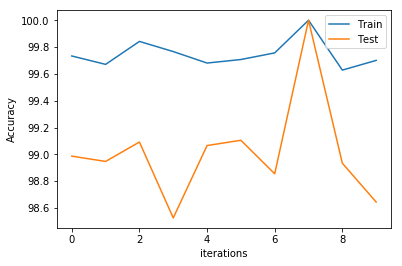

In [0]:
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.legend(loc='upper right')
plt.show()